# CS210 Project - Spotify Top Songs Analysis by Berk Efe Erdem #28403

## Introduction and Motivation

For the Final Project of CS210, Introduction to Data Science course at Sabancı University, I decided to use my Spotify Top Songs Playlists in years 2020, 2021, 2022 and 2023; to have an insight of my listening habits. I aimed to see my statistics about different metrics, different genres and different artists in recent years, so I decided to use not only the last year's data but a 4 year worth of data consisting top 100 songs for each year.

My plan for the project is to first get the data as a CSV file, then I'll implement it in Jupyter Notebook. I will clean the data and handle the NaN values, to get better insights in every step of action. Then I will conduct different EDA and Visualization techniques, to observe how is the data in different metrics are distributed over the course of 4 years, and each year individually. I will analyze the trends, and correlations, to see how my listening habits have changed from age 20 to 23.

As a next step, I will conduct various Hypothesis Tests, including t-tests, ANOVA tests, and chi-square tests. I will form my null hypothesis for each before starting the test, and as a result, I aim to see that if my predictions about my listening habits are statistically true or not.

As the final step, I will use different Machine Learning processes like Regression and Classification Models, K - Means Clustering, Time Series Analysis, Random Forest Classifying; to observe different metrics that is not included in the CSV file, to forecast my future listening habits based on the changes, find the collaborations between genres and artists.

## Data Source

The playlists that I will use in the project are located in Spotify's own database. I added Top Songs 2020, 2021, 2022 and 2023 to my Liked Playlists, and then I used a third-party program called Exportify to export all those playlists in the CSV format. With the aid of Microsoft Excel, I concatenated all playlists as a one single playlist, called 'your_top_songs_4yearsv3.csv'. Starting below, I will clean, and analyze the data as I planned step by step, with further elaborations like EDA and Visualization, Hypothesis Testing and Machine Learning Models 

## Data Analysis

## 1. Uploading the dataset and cleaning the data

In this section, I add necessary libraries that I'll work with. The code imports necessary libraries for data analysis and visualization. 'pandas' is used for data manipulation, 'numpy' for numerical operations, and 'datetime' for working with date and time. 'scipy.stats' provides statistical functions, and 'seaborn' along with 'matplotlib.pyplot' are for creating visualizations. These libraries together enable a comprehensive approach to handle, analyze, and visualize data effectively.

In [468]:
import pandas as pd 
import numpy as np
from datetime import datetime
from scipy import stats
import seaborn as sns  
import matplotlib.pyplot as plt




The code loads a dataset named 'your_top_songs_4yearsv3.csv' and provides a summary with 'info' and displays the first five rows. The section titled 'Data Cleaning and Formatting' converts the 'Date' column to datetime format, checks for missing values, and prints the sum of missing values per column. Data types are examined and displayed, and potential actions like dropping rows with missing values or handling outliers are suggested. The cleaned dataset is then shown with the initial rows. This process ensures the dataset is well-prepared for analysis, addressing issues like missing values and data types.

In [469]:
data = pd.read_csv('your_top_songs_4yearsv3.csv',sep=';')

In [470]:
data.info

<bound method DataFrame.info of                  Spotify ID                                     Artist IDs  \
0    0TBylB8tjwqp4YHSrwRJQQ                         5eioJDe26lOqkAMbuhzZYs   
1    41ZYUGtRGAi3SEx23AZXfB  1aS5tqEs9ci5P9KD9tZWa6,0Dvx6p8JDyzeOPGmaCIH1L   
2    0v4BTk3Vlhmfduww4WFOwA  3jPN2U65cMPzvozEBue5zp,7KcIok6StqYSedgtjmtsqP   
3    0K2nzvf5Pn6IO0Xyt36iNi                         1oR56GSDAFgtdKmSl6qU1r   
4    53HqOfi7OfHRXzcWTdGJB3                         4Xi6LSfFqv26XgP9NKN26U   
..                      ...                                            ...   
396  7KOlJ92bu51cltsD9KU5I7                         6oMuImdp5ZcFhWP0ESe6mG   
397  2PuOL2TPoCxywuCdKQuNcN  2QU0UNvQvEZ2fuRUhkUNq4,0FUsrstJwmg4WVHQMTYuUA   
398  6PH548X1PtBybwprYrPw72                         1wiLnXZPHOvNhsltvC1wC0   
399  19o3yH5Mc7vJs34SKC5adF  1iJrQKRh5aJnp6cG5lpITr,643VmvA9t1Td4REc5YWkW4   
400  2kL9OssrgAGRNHLlJhLVxc                         2y1VzMKAa5nmfXKtJL9jnj   

               Track Name      

In [471]:
data.head(5)

Spotify ID                                     Artist IDs  \
0  0TBylB8tjwqp4YHSrwRJQQ                         5eioJDe26lOqkAMbuhzZYs   
1  41ZYUGtRGAi3SEx23AZXfB  1aS5tqEs9ci5P9KD9tZWa6,0Dvx6p8JDyzeOPGmaCIH1L   
2  0v4BTk3Vlhmfduww4WFOwA  3jPN2U65cMPzvozEBue5zp,7KcIok6StqYSedgtjmtsqP   
3  0K2nzvf5Pn6IO0Xyt36iNi                         1oR56GSDAFgtdKmSl6qU1r   
4  53HqOfi7OfHRXzcWTdGJB3                         4Xi6LSfFqv26XgP9NKN26U   

         Track Name            Album Name          Artist Name Release Date  \
0             Späti       Grosse Freiheit                 Gzuz   2022-01-13   
1            Sommer  Palmen aus Plastik 3  Bonez MC,RAF Camora   2022-09-08   
2        ADRENALINA            ADRENALINA       SIDARTA,Beyond   2022-08-11   
3              Özür                  Özür             Halodayı   2023-01-27   
4  Little More Love              Flu Game            AJ Tracey   2021-04-16   

   Duration (ms)  Popularity  Date  \
0         152771          63  2023   
1         193749          62  2023   
2         219661          59  2023   
3         135416          73  2023   
4         160000          64  2023   

                                              Genres  ...  Key  Loudness  \
0  deep german hip hop,german hip hop,hamburg hip...  ...    1    -6.093   
1                     german hip hop,hamburg hip hop  ...    6    -7.841   
2                                         greek trap  ...    7    -6.215   
3                                    turkish hip hop  ...    7    -9.200   
4                       grime,uk hip hop,ukg revival  ...    6    -6.623   

   Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0     1     186.0000         311.0          0.003550  165.0000    482.0   
1     0       0.0717         706.0          0.140000    0.0957    385.0   
2     1       0.0929          31.0          0.000503  199.0000    346.0   
3     0     137.0000         423.0          0.000094  236.0000    538.0   
4     1     114.0000         199.0          0.000010  358.0000    676.0   

     Tempo  Time Signature  
0  140.064               4  
1  106.011               4  
2  117.871               4  
3  143.953               4  
4  100.080               4  

[5 rows x 22 columns]

In [472]:
# 3. Data Cleaning and Formatting

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values if needed
# For example: data = data.dropna()  # Drop rows with missing values

# Check data types
data_types = data.dtypes
print("\nData Types:\n", data_types)

# Check for outliers
# For example: sns.boxplot(x=data['Popularity'])
# Identify and handle outliers accordingly

# Additional cleaning and formatting as needed
# For example: data['Column'] = data['Column'].apply(lambda x: clean_function(x))

# Display the cleaned dataset
data.head(5)


Missing Values:
 Spotify ID           0
Artist IDs           0
Track Name           0
Album Name           0
Artist Name          0
Release Date         0
Duration (ms)        0
Popularity           0
Date                 0
Genres              38
Danceability         0
Energy               0
Key                  0
Loudness             0
Mode                 0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Time Signature       0
dtype: int64

Data Types:
 Spotify ID                  object
Artist IDs                  object
Track Name                  object
Album Name                  object
Artist Name                 object
Release Date                object
Duration (ms)                int64
Popularity                   int64
Date                datetime64[ns]
Genres                      object
Danceability               float64
Energy                     float64
Key                          i

Spotify ID                                     Artist IDs  \
0  0TBylB8tjwqp4YHSrwRJQQ                         5eioJDe26lOqkAMbuhzZYs   
1  41ZYUGtRGAi3SEx23AZXfB  1aS5tqEs9ci5P9KD9tZWa6,0Dvx6p8JDyzeOPGmaCIH1L   
2  0v4BTk3Vlhmfduww4WFOwA  3jPN2U65cMPzvozEBue5zp,7KcIok6StqYSedgtjmtsqP   
3  0K2nzvf5Pn6IO0Xyt36iNi                         1oR56GSDAFgtdKmSl6qU1r   
4  53HqOfi7OfHRXzcWTdGJB3                         4Xi6LSfFqv26XgP9NKN26U   

         Track Name            Album Name          Artist Name Release Date  \
0             Späti       Grosse Freiheit                 Gzuz   2022-01-13   
1            Sommer  Palmen aus Plastik 3  Bonez MC,RAF Camora   2022-09-08   
2        ADRENALINA            ADRENALINA       SIDARTA,Beyond   2022-08-11   
3              Özür                  Özür             Halodayı   2023-01-27   
4  Little More Love              Flu Game            AJ Tracey   2021-04-16   

   Duration (ms)  Popularity                          Date  \
0         152771          63 1970-01-01 00:00:00.000002023   
1         193749          62 1970-01-01 00:00:00.000002023   
2         219661          59 1970-01-01 00:00:00.000002023   
3         135416          73 1970-01-01 00:00:00.000002023   
4         160000          64 1970-01-01 00:00:00.000002023   

                                              Genres  ...  Key  Loudness  \
0  deep german hip hop,german hip hop,hamburg hip...  ...    1    -6.093   
1                     german hip hop,hamburg hip hop  ...    6    -7.841   
2                                         greek trap  ...    7    -6.215   
3                                    turkish hip hop  ...    7    -9.200   
4                       grime,uk hip hop,ukg revival  ...    6    -6.623   

   Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0     1     186.0000         311.0          0.003550  165.0000    482.0   
1     0       0.0717         706.0          0.140000    0.0957    385.0   
2     1       0.0929          31.0          0.000503  199.0000    346.0   
3     0     137.0000         423.0          0.000094  236.0000    538.0   
4     1     114.0000         199.0          0.000010  358.0000    676.0   

     Tempo  Time Signature  
0  140.064               4  
1  106.011               4  
2  117.871               4  
3  143.953               4  
4  100.080               4  

[5 rows x 22 columns]

## 2. Exploratory Data Analysis and Visualization

### 2.1 Top 10 Genres Analysis

The code first analyzes music genres in the dataset by splitting the "Genres" column into individual rows for each genre. It creates a list, 'unique_genres,' to store distinct genres and counts their occurrences. The result is a DataFrame, 'genre_data,' with genres and their counts, sorted in descending order. The top 10 genres are selected and printed with their respective counts, offering insights into the most popular genres between 2020-2023.

In [473]:
# Split the "Genres" column into separate rows for each genre
data = data.explode("Genres")

# Create a list to store all unique genres
unique_genres = []

# Loop in each row of the DataFrame
for index, row in data.iterrows():
  if isinstance(row["Genres"], str):
    genres = row["Genres"].split(",")

    # Removing  whitespaces
    for genre in genres:
      genre = genre.strip()

      # If the genre not already in the list, add it
      if genre not in unique_genres:
        unique_genres.append(genre)

# Create a dictionary to store the count of each genre
genre_counts = {}

for genre in unique_genres:
  genre_counts[genre] = 0

# Loop in each row of the DataFrame again
for index, row in data.iterrows():
  if isinstance(row["Genres"], str):
    genres = row["Genres"].split(",")

    # Remove whitespaces
    for genre in genres:
      genre = genre.strip()

      # Increment the count
      genre_counts[genre] += 1

# Create a DataFrame with the unique genres and their counts
genre_data = pd.DataFrame(genre_counts.items(), columns=["Genres", "Count"])

# Sort the DataFrame by the "Count" column in descending order
genre_data = genre_data.sort_values(by=["Count"], ascending=False)

# Select the top 10 genres
top_10_genres = genre_data.head(10)

# Print the top 10 genres and their counts
print("Top 10 Genres with Counts Between 2020-2023:")
for genre, count in top_10_genres.values.tolist():
  print(f"{genre}: {count}")


Top 10 Genres with Counts Between 2020-2023:
turkish trap: 137
turkish hip hop: 131
rap: 68
german hip hop: 61
turkce drill: 58
hip hop: 47
pop rap: 36
trap: 25
melodic rap: 23
pop: 22


The code creates two visualizations: a bar plot showcasing the top 10 genres with their counts between 2020-2023 and a pie chart illustrating the distribution of these genres. The bar plot uses Seaborn's 'barplot,' styled with a 'viridis' color palette, while the pie chart displays genre proportions as percentages. Both visualizations provide a concise and graphical overview of the music genre landscape during the specified period. Note that, even though pie charts can be confusing, it provides a good analytic insight in this case.

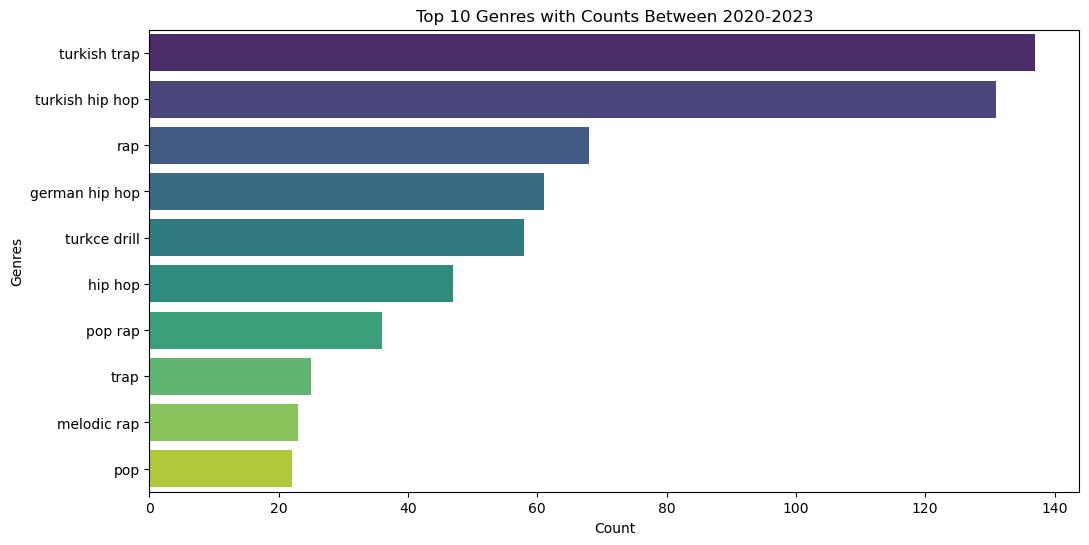

In [474]:
# Bar plot for top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Genres", data=top_10_genres, palette="viridis")
plt.title("Top 10 Genres with Counts Between 2020-2023")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

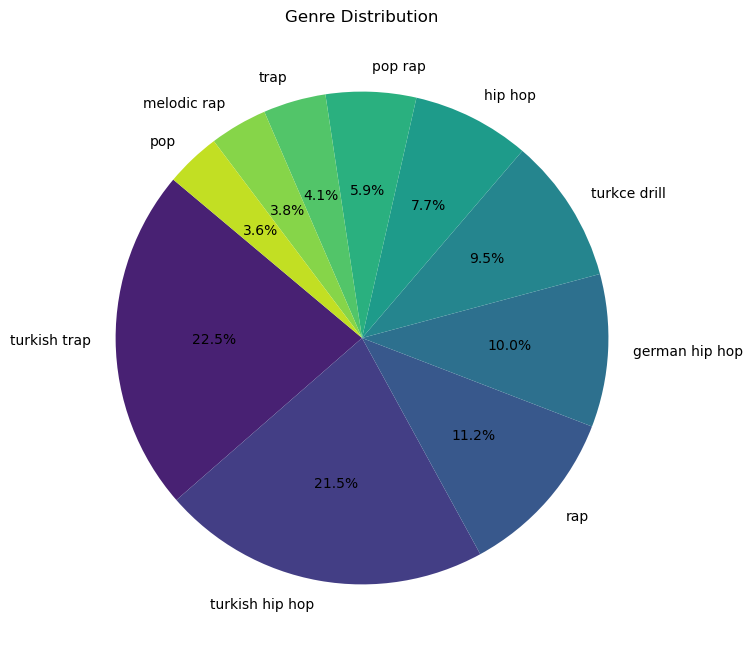

In [475]:
# Pie chart for genre distribution
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres["Count"], labels=top_10_genres["Genres"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 10))
plt.title("Genre Distribution")
plt.show()

### 2.2 Top 10 Artists Analysis

In this section, the code analyzes artist information in the dataset, identifying unique artists, counting their occurrences, and creating a DataFrame with this data. The top 10 artists are then highlighted, printed, and presented visually through a bar plot. This plot, generated with Seaborn's 'barplot,' effectively illustrates the most frequently occurring artists and provides a straightforward overview of their contributions to the dataset.

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with genres exploded into separate rows

# Create a list to store all unique artists
unique_artists = []

# Loop through each row of the DataFrame
for index, row in data.iterrows():
    if isinstance(row["Artist Name"], str):
        artists = [artist.strip() for artist in row["Artist Name"].split(",")]

        # If the artist is not already in the list, add it
        for artist in artists:
            if artist not in unique_artists:
                unique_artists.append(artist)

# Create a dictionary to store the count of each artist
artist_counts = {}

for artist in unique_artists:
    artist_counts[artist] = 0

# Loop through each row of the DataFrame again
for index, row in data.iterrows():
    if isinstance(row["Artist Name"], str):
        artists = [artist.strip() for artist in row["Artist Name"].split(",")]

        # Increment the count for each artist
        for artist in artists:
            artist_counts[artist] += 1

# Create a DataFrame with the unique artists and their counts
artist_data = pd.DataFrame(artist_counts.items(), columns=["Artist Name", "Count"])

# Sort the DataFrame by the "Count" column in descending order
artist_data = artist_data.sort_values(by=["Count"], ascending=False)

# Select the top 10 artists
top_10_artists = artist_data.head(10)

# Print the top 10 artists and their counts
print("Top 10 Artists with Counts:")
for artist, count in top_10_artists.values.tolist():
    print(f"{artist}: {count}")



Top 10 Artists with Counts:
Ezhel: 24
Lvbel C5: 21
UZI: 21
Dante: 19
Odin: 19
Motive: 15
Travis Scott: 15
Batdora: 15
Khontkar: 14
Drake: 14


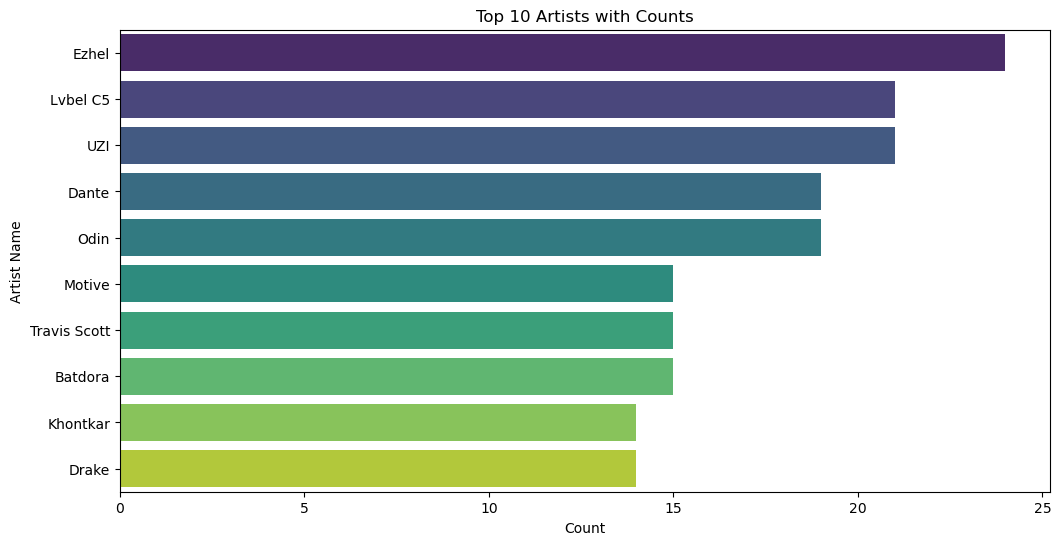

In [522]:
# Plot a histogram
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Artist Name", data=top_10_artists, palette="viridis")
plt.title("Top 10 Artists with Counts")
plt.xlabel("Count")
plt.ylabel("Artist Name")
plt.show()


### 2.3 Top 5 Genres Each Year (2020-2023)

In this section, the code performs exploratory data analysis (EDA) and visualization of genre trends over the years within the dataset. It defines a function, analyze_and_visualize_genres, to filter data for a specific year, explode the "Genres" column, and then count and visualize the top 5 genres. The loop iterates through the years 2020 to 2023, applying this analysis for each year.

For each iteration, the function extracts and processes data for the specified year, identifies unique genres, counts their occurrences, and prints the top 5 genres with their respective counts. Additionally, it generates a bar plot using Seaborn to visually represent the genre distribution for each year. This iterative approach allows for a year-wise examination of genre popularity trends, aiding in understanding the evolving musical preferences captured in the dataset.

Top 5 Genres with Counts in 2020:
turkish hip hop: 45
turkish trap: 42
rap: 28
hip hop: 22
slap house: 11


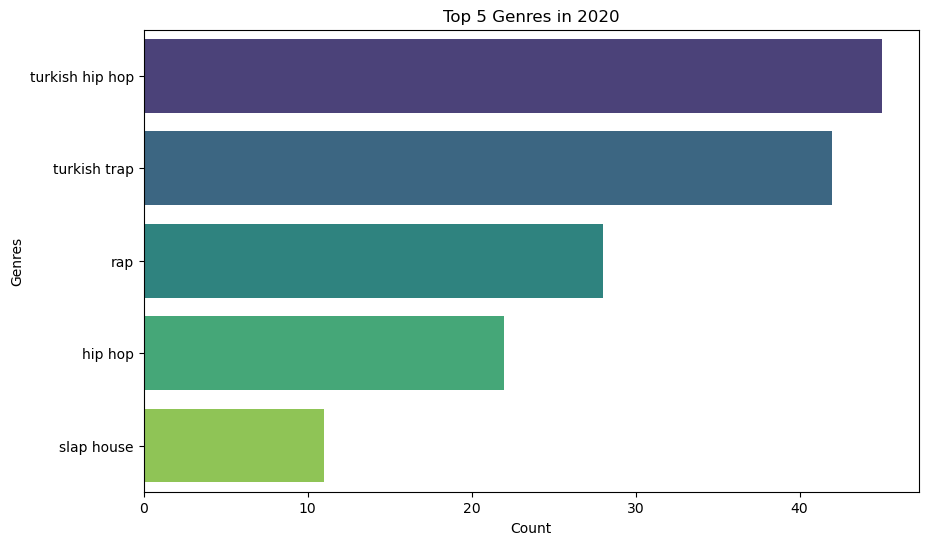

Top 5 Genres with Counts in 2021:
rap: 28
turkish hip hop: 24
turkish trap: 22
pop rap: 21
hip hop: 19


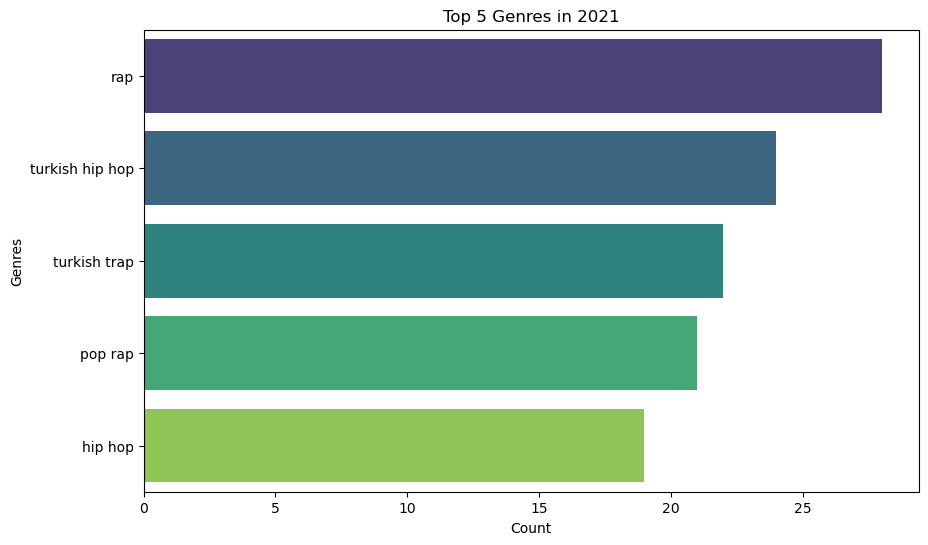

Top 5 Genres with Counts in 2022:
turkish trap: 46
turkish hip hop: 35
turkce drill: 26
german hip hop: 21
new school turkce rap: 6


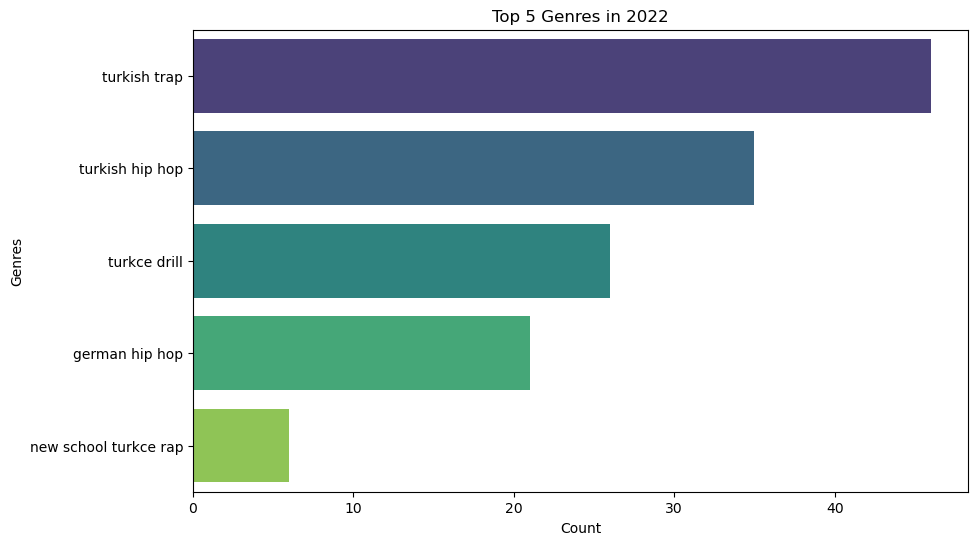

Top 5 Genres with Counts in 2023:
german hip hop: 30
turkish hip hop: 27
turkish trap: 27
turkce drill: 20
rap: 9


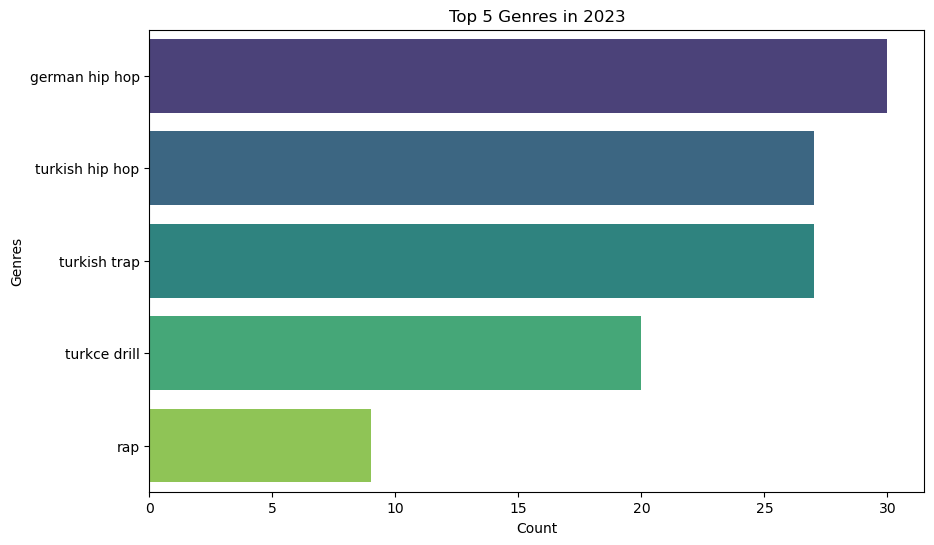

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Convert 'Date' column to string for string comparison
data['Date'] = data['Date'].astype(str)

# Create a function for EDA and Visualization
def analyze_and_visualize_genres(data, year):
    # Filter rows for the specified year
    data_year = data[data['Date'].str.contains(str(year))]

    # Split the "Genres" column into separate rows for each genre
    data_year = data_year.explode("Genres")

    # Create a list to store all unique genres for the year
    unique_genres_year = []

    # Create a dictionary to store the count of each genre for the year
    genre_counts_year = {}

    # Loop through each row of the filtered DataFrame
    for index, row in data_year.iterrows():
        if isinstance(row["Genres"], str):
            genres = row["Genres"].split(",")

            # Removing whitespaces
            for genre in genres:
                genre = genre.strip()

                # If the genre not already in the list, add it
                if genre not in unique_genres_year:
                    unique_genres_year.append(genre)
                    genre_counts_year[genre] = 1
                else:
                    genre_counts_year[genre] += 1

    # Create a DataFrame with the unique genres and their counts for the year
    genre_data_year = pd.DataFrame(list(genre_counts_year.items()), columns=["Genres", "Count"])

    # Sort the DataFrame by the "Count" column in descending order
    genre_data_year = genre_data_year.sort_values(by=["Count"], ascending=False)

    # Select the top 5 genres for the year
    top_5_genres_year = genre_data_year.head(5)

    # Print the top 5 genres and their counts for the year
    print(f"Top 5 Genres with Counts in {year}:")
    for genre, count in top_5_genres_year.values.tolist():
        print(f"{genre}: {count}")

    # Visualize the top genres using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Genres', data=top_5_genres_year, palette='viridis')
    plt.title(f"Top 5 Genres in {year}")
    plt.xlabel('Count')
    plt.ylabel('Genres')
    plt.show()

# Analyze and visualize for each year
for year in range(2020, 2024):
    analyze_and_visualize_genres(data, year)


### 2.4 Trend Analysis of Genres

In this section, the code generates a comprehensive line plot, offering insights into the trends of music genres across the years 2020 to 2023. Through a loop iterating over each year, the code extracts and analyzes data specific to that year, portraying the count of individual genres. The resulting plot vividly displays how the popularity of various music genres evolves over time, with each line on the graph representing a distinct year. 

This graphical representation not only allows for a year-by-year comparison but also facilitates the identification of overarching patterns, shifts, or emerging trends in genre preferences within the dataset. 

The x-axis conveniently showcases different genres, while the y-axis provides a clear count representation, making it an effective tool for trend analysis and pattern recognition in the realm of music preferences.

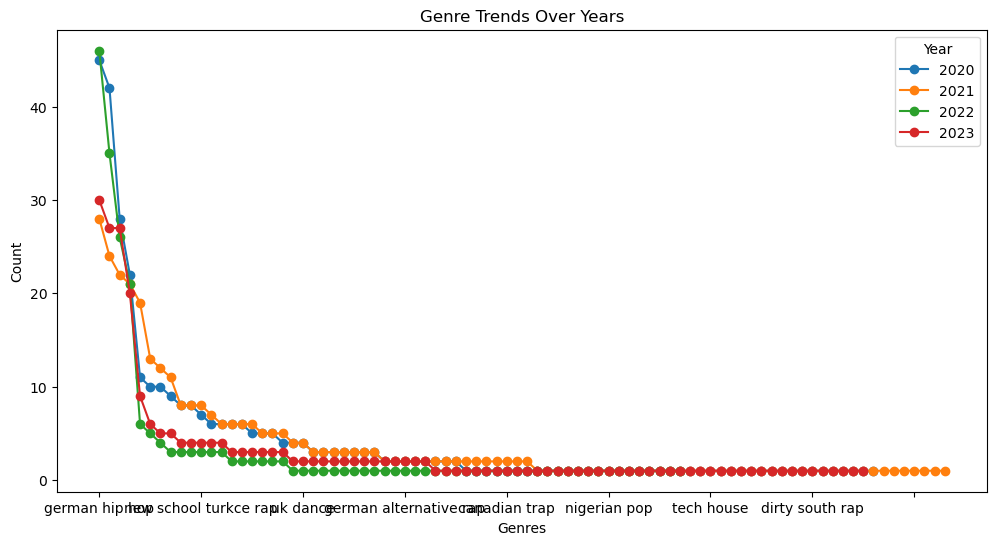

In [482]:
# Line plot to observe trends over the years
plt.figure(figsize=(12, 6))
for year in range(2020, 2024):
    data_year = data[data['Date'].str.contains(str(year))]
    genre_counts_year = data_year['Genres'].str.split(',', expand=True).stack().str.strip().value_counts()
    genre_counts_year.plot(label=year, marker='o')

plt.title("Genre Trends Over Years")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.legend(title="Year")
plt.show()

### 2.5 Top 5 Artists Each Year (2020-2023)

In this section, the code employs Python's pandas, matplotlib, and seaborn libraries to conduct exploratory data analysis (EDA) and visualize the top artists in the dataset for each year from 2020 to 2023. The 'analyze_and_visualize_artists' function systematically filters the data for a specified year, identifies unique artists, and computes the count for each artist during that period. 

The top 5 artists are then extracted and presented, along with their respective counts, providing a quick overview of the most prominent artists in each year. 

The code concludes with a series of bar plots visualizing these top artists, offering a clear and concise representation of the changing landscape of popular music artists over the four-year span.

Top 5 Artists with Counts in 2020:
Travis Scott: 11
Khontkar: 11
Ezhel: 9
Murda: 8
Drake: 7


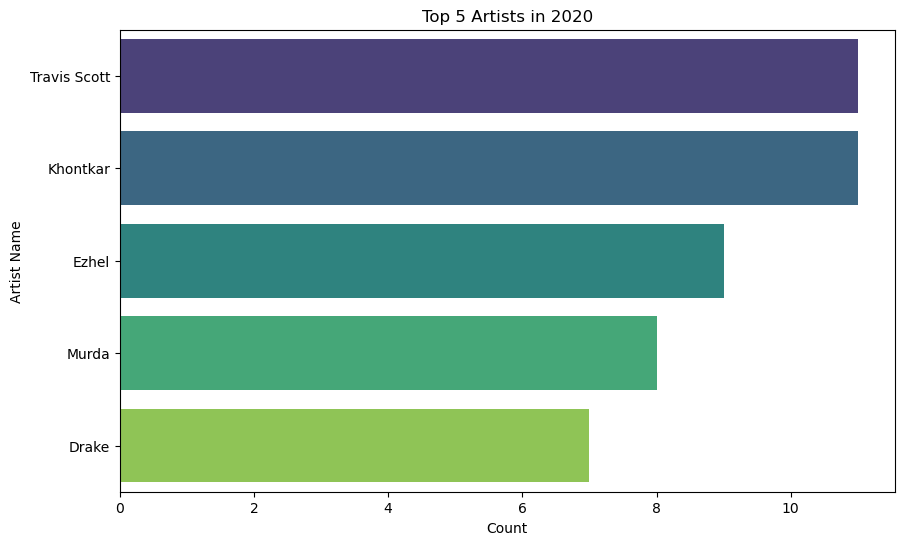

Top 5 Artists with Counts in 2021:
Odin: 8
Post Malone: 8
Ezhel: 7
Drake: 7
Dante: 6


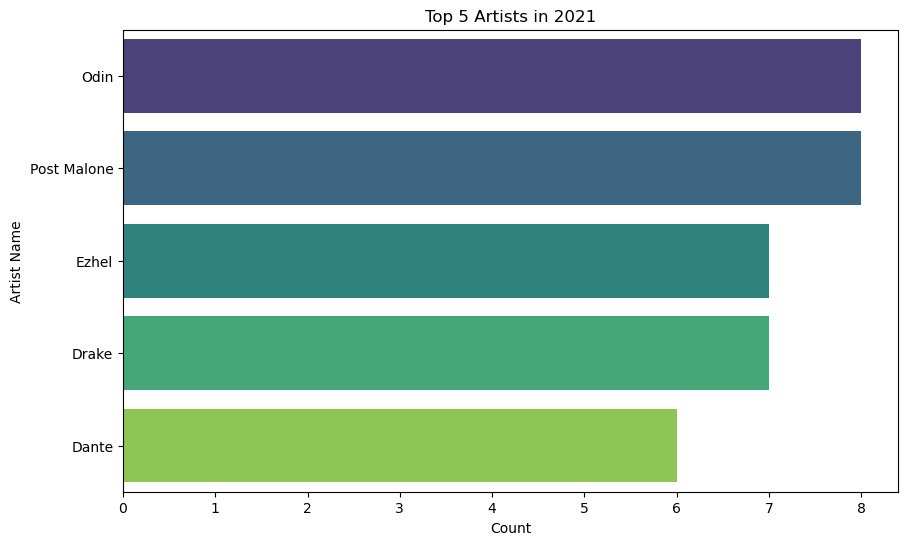

Top 5 Artists with Counts in 2022:
UZI: 14
Lvbel C5: 13
Dante: 9
Motive: 8
Odin: 6


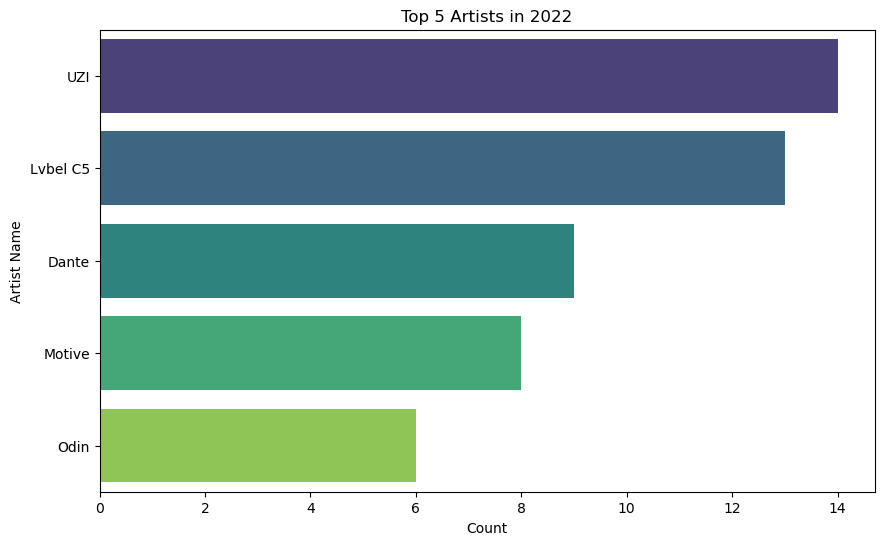

Top 5 Artists with Counts in 2023:
RAF Camora: 7
Lvbel C5: 6
UZI: 5
BLOK3: 5
Ezhel: 5


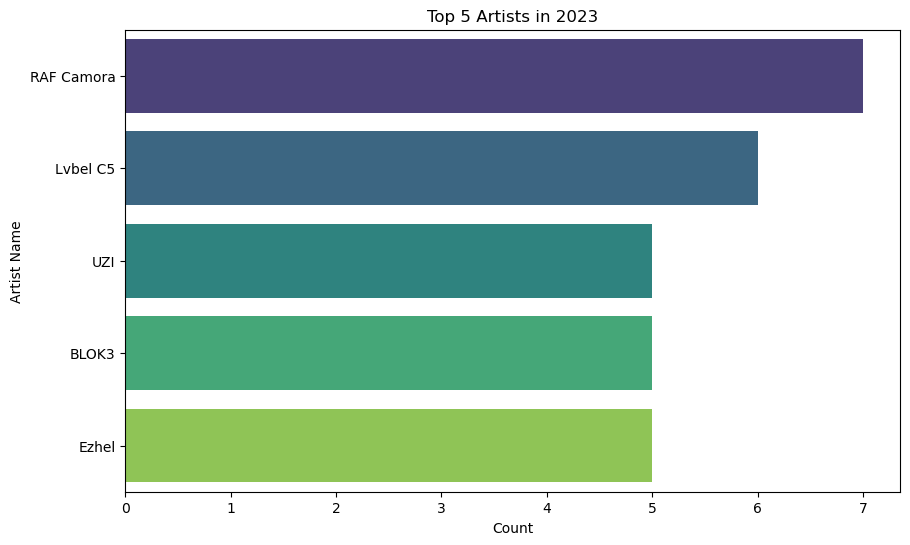

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Convert 'Date' column to string for string comparison
data['Date'] = data['Date'].astype(str)

# Create a function for EDA and Visualization
def analyze_and_visualize_artists(data, year):
    # Filter rows for the specified year
    data_year = data[data['Date'].str.contains(str(year))]

    # Create a list to store all unique artists for the year
    unique_artists_year = []

    # Create a dictionary to store the count of each artist for the year
    artist_counts_year = {}

    # Loop through each row of the filtered DataFrame
    for index, row in data_year.iterrows():
        if isinstance(row["Artist Name"], str):
            artists = [artist.strip() for artist in row["Artist Name"].split(",")]

            # If the artist is not already in the list, add it
            for artist in artists:
                if artist not in unique_artists_year:
                    unique_artists_year.append(artist)
                    artist_counts_year[artist] = 1
                else:
                    artist_counts_year[artist] += 1

    # Create a DataFrame with the unique artists and their counts for the year
    artist_data_year = pd.DataFrame(list(artist_counts_year.items()), columns=["Artist Name", "Count"])

    # Sort the DataFrame by the "Count" column in descending order
    artist_data_year = artist_data_year.sort_values(by=["Count"], ascending=False)

    # Select the top 5 artists for the year
    top_5_artists_year = artist_data_year.head(5)

    # Print the top 5 artists and their counts for the year
    print(f"Top 5 Artists with Counts in {year}:")
    for artist, count in top_5_artists_year.values.tolist():
        print(f"{artist}: {count}")

    # Visualize the top artists using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Artist Name', data=top_5_artists_year, palette='viridis')
    plt.title(f"Top 5 Artists in {year}")
    plt.xlabel('Count')
    plt.ylabel('Artist Name')
    plt.show()
    

# Analyze and visualize for each year
for year in range(2020, 2024):
    analyze_and_visualize_artists(data, year)


### 2.6 Trend Analysis of Artists

In this code segment, Python's pandas, matplotlib, and seaborn libraries are utilized to perform exploratory data analysis (EDA) and visualize the trend of artists over the years 2020 to 2023. The 'analyze_and_visualize_artists_trend' function systematically processes the data, extracting and aggregating the counts of each artist for each individual year. 

The resulting artist trend is then visualized through a line plot, where each artist is represented by a distinctive line, providing a comprehensive view of their evolving popularity across the specified timeframe. 

The plot serves as an effective visual tool for identifying patterns and changes in the artists' prominence, allowing us to see the net change of each artists' importance in my 4 year dataset.

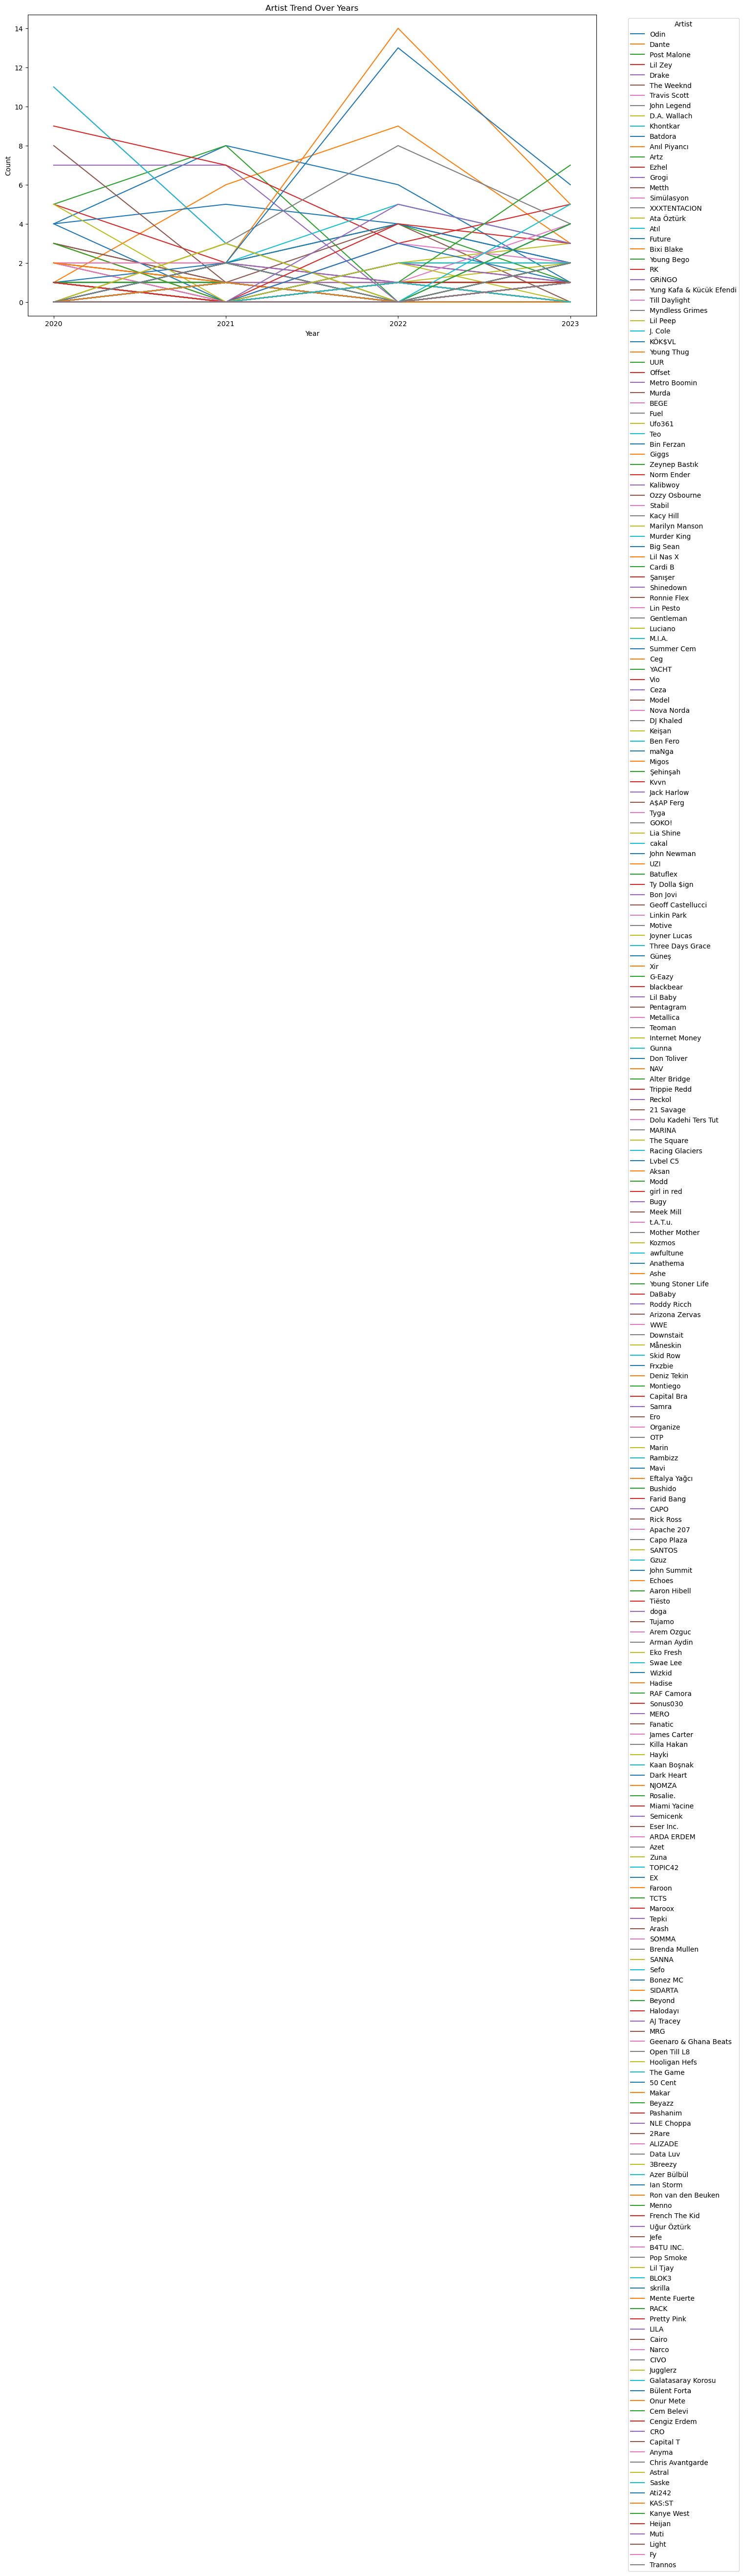

In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Convert 'Date' column to string for string comparison
data['Date'] = data['Date'].astype(str)

# Create a function for EDA and Visualization
def analyze_and_visualize_artists_trend(data):
    # Create a dictionary to store the count of each artist for each year
    artist_counts_by_year = {}

    # Loop through each year
    for year in range(2020, 2024):
        # Filter rows for the specified year
        data_year = data[data['Date'].str.contains(str(year))]

        # Create a dictionary to store the count of each artist for the year
        artist_counts_year = {}

        # Loop through each row of the filtered DataFrame
        for index, row in data_year.iterrows():
            if isinstance(row["Artist Name"], str):
                artists = [artist.strip() for artist in row["Artist Name"].split(",")]

                # If the artist is not already in the dictionary, add it
                for artist in artists:
                    if artist not in artist_counts_year:
                        artist_counts_year[artist] = 1
                    else:
                        artist_counts_year[artist] += 1

        # Update the overall dictionary with counts for the current year
        artist_counts_by_year[year] = artist_counts_year

    # Create a DataFrame with the aggregated counts for each artist over the years
    artist_data_trend = pd.DataFrame(artist_counts_by_year).T.fillna(0)

    # Visualize the trend using a line plot
    plt.figure(figsize=(15, 8))
    for artist in artist_data_trend.columns:
        plt.plot(['2020', '2021', '2022', '2023'], artist_data_trend[artist].values, label=artist)

    plt.title("Artist Trend Over Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Analyze and visualize the trend for artists
analyze_and_visualize_artists_trend(data)


### 2.7 Descriptive Statistics, Histograms, Boxplots and Trend Analysis for Numerical Variables

In this section, the code uses pandas, seaborn, and matplotlib to analyze numerical data in the 'data' DataFrame. It goes through each numerical column, creating visualizations and basic statistics. For each column, it makes a three-panel figure showing a histogram, a boxplot, and a line plot over time. 

This approach gives a clear picture of how the data is distributed and how it changes over the given period. The code also prints basic statistics for each column, providing a summary of important metrics. Overall, this code helps understand and explore the numerical aspects of the dataset.

The figures consist of three parts:

1) Histogram: Shows the distribution of data values using bars and a smooth line (KDE).
2) Boxplot: Summarizes data statistics, indicating median, spread (IQR), and potential outliers.
3) Line Plot for Trend: Displays how the numerical data changes over time.

These visuals provide a quick overview of data patterns, statistics, and temporal trends.

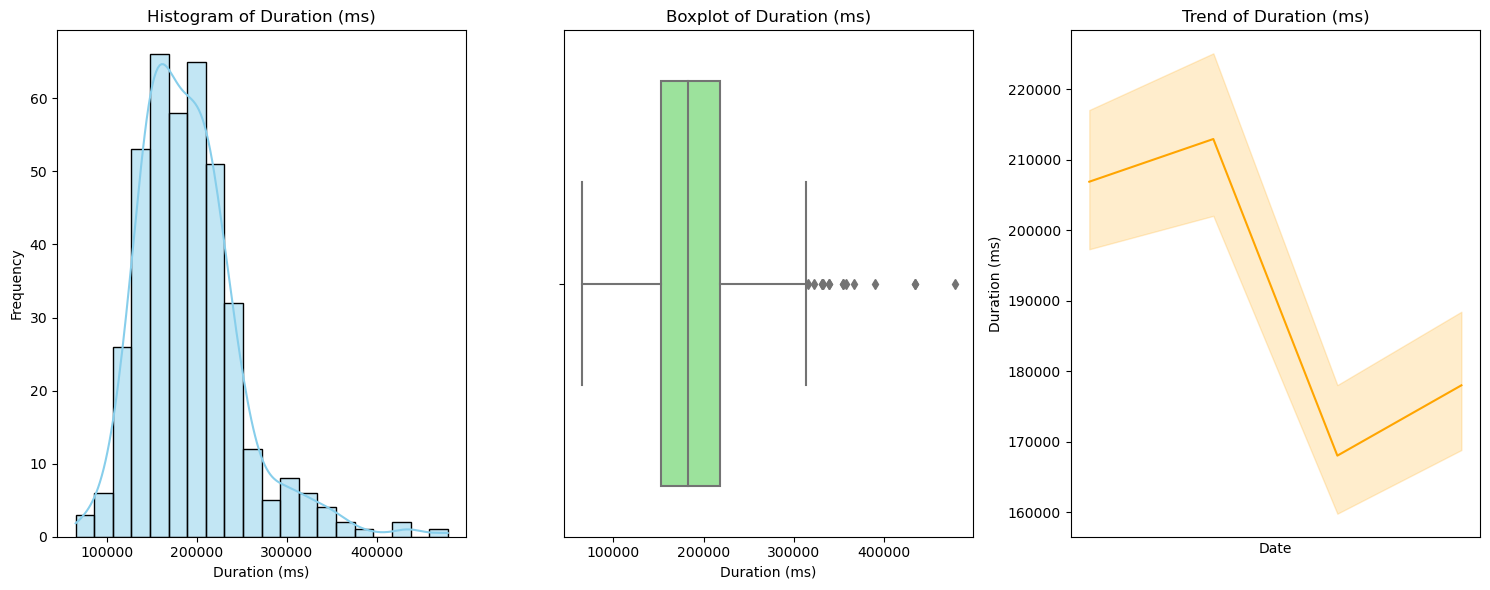

Descriptive Statistics for Duration (ms):
count       401.000000
mean     191411.241895
std       56265.534804
min       65687.000000
25%      152301.000000
50%      182400.000000
75%      217828.000000
max      478133.000000
Name: Duration (ms), dtype: float64



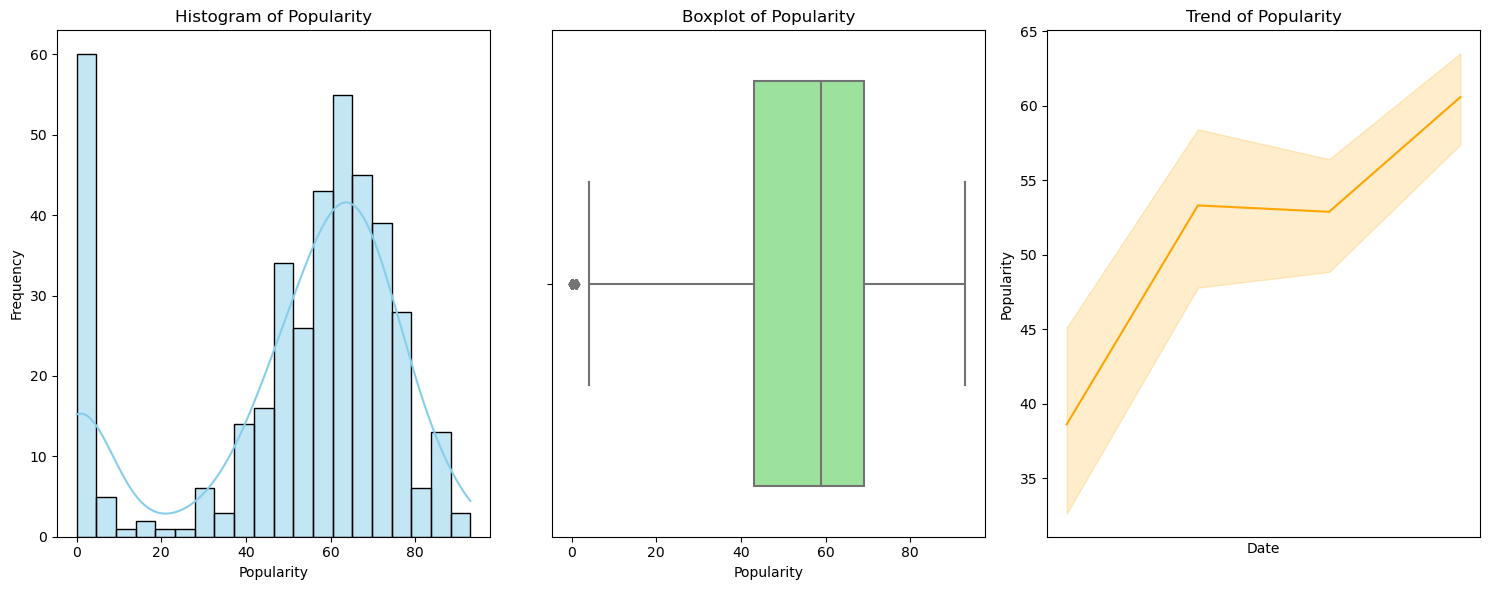

Descriptive Statistics for Popularity:
count    401.000000
mean      51.359102
std       25.556911
min        0.000000
25%       43.000000
50%       59.000000
75%       69.000000
max       93.000000
Name: Popularity, dtype: float64



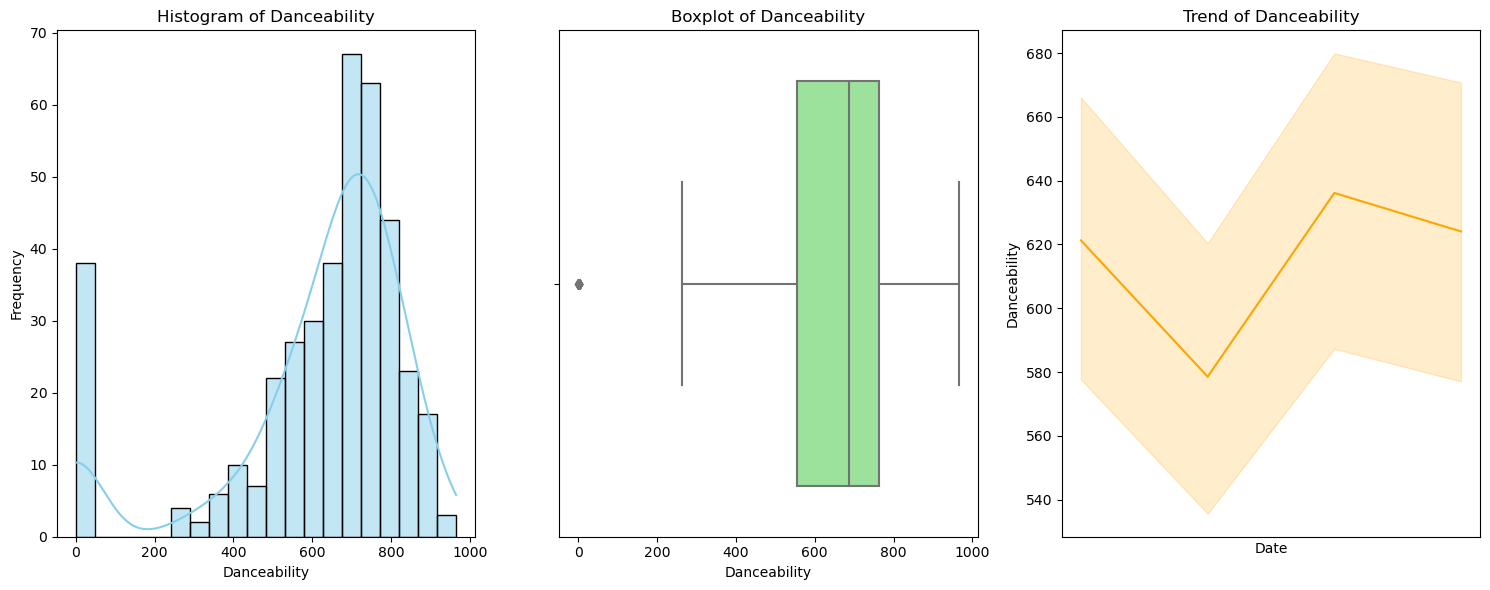

Descriptive Statistics for Danceability:
count    401.000000
mean     615.059875
std      235.320158
min        0.440000
25%      556.000000
50%      687.000000
75%      764.000000
max      965.000000
Name: Danceability, dtype: float64



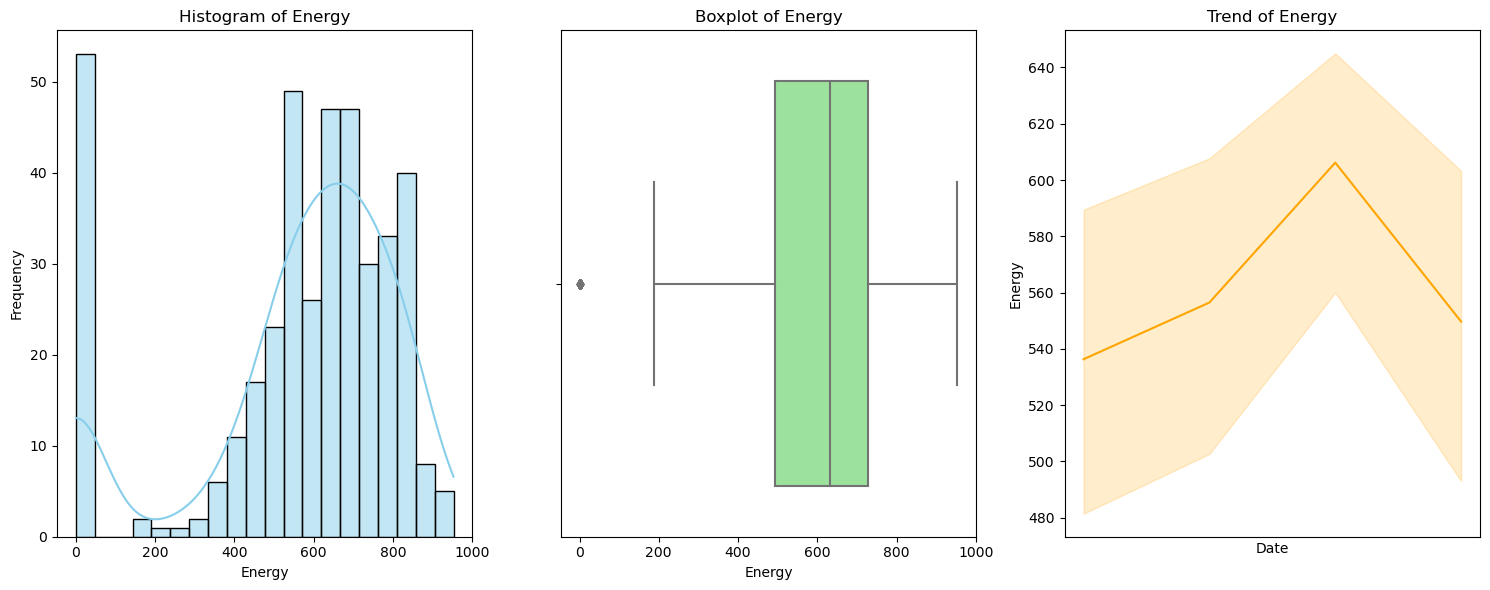

Descriptive Statistics for Energy:
count    401.000000
mean     562.273217
std      256.765589
min        0.480000
25%      493.000000
50%      633.000000
75%      727.000000
max      953.000000
Name: Energy, dtype: float64



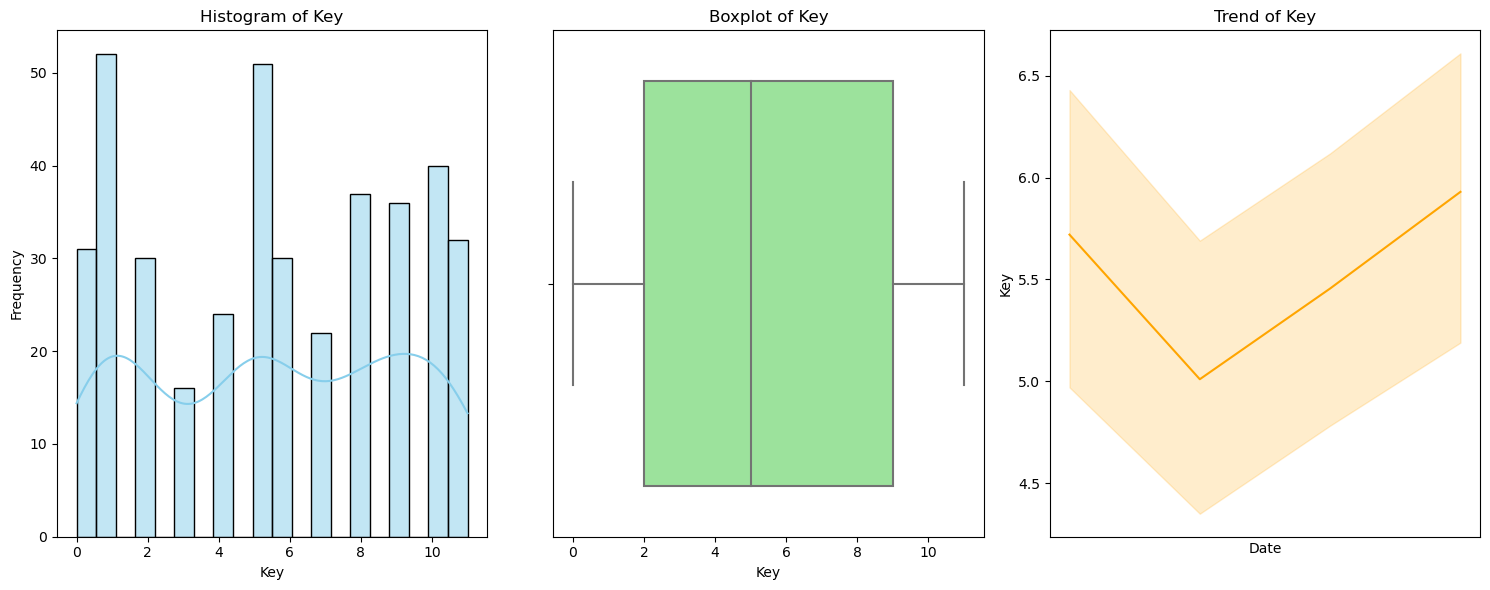

Descriptive Statistics for Key:
count    401.000000
mean       5.528678
std        3.546801
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       11.000000
Name: Key, dtype: float64



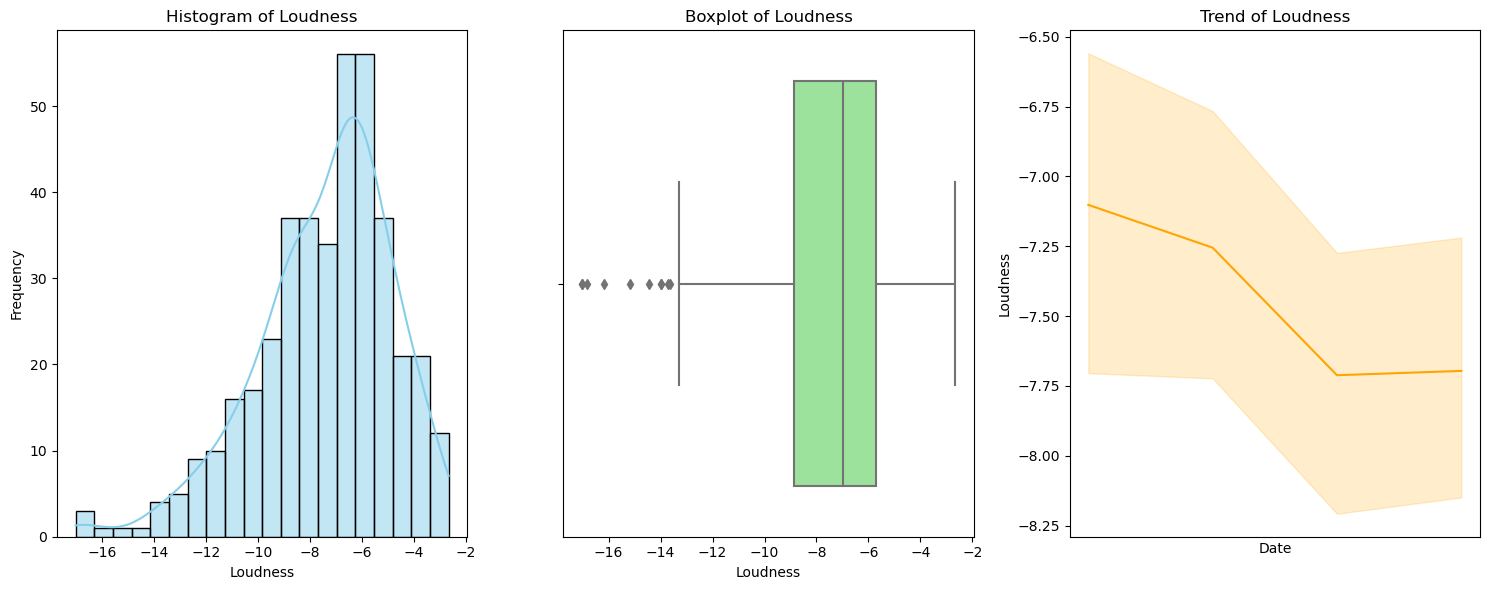

Descriptive Statistics for Loudness:
count    401.000000
mean      -7.442115
std        2.600358
min      -17.026000
25%       -8.852000
50%       -6.964000
75%       -5.701000
max       -2.665000
Name: Loudness, dtype: float64



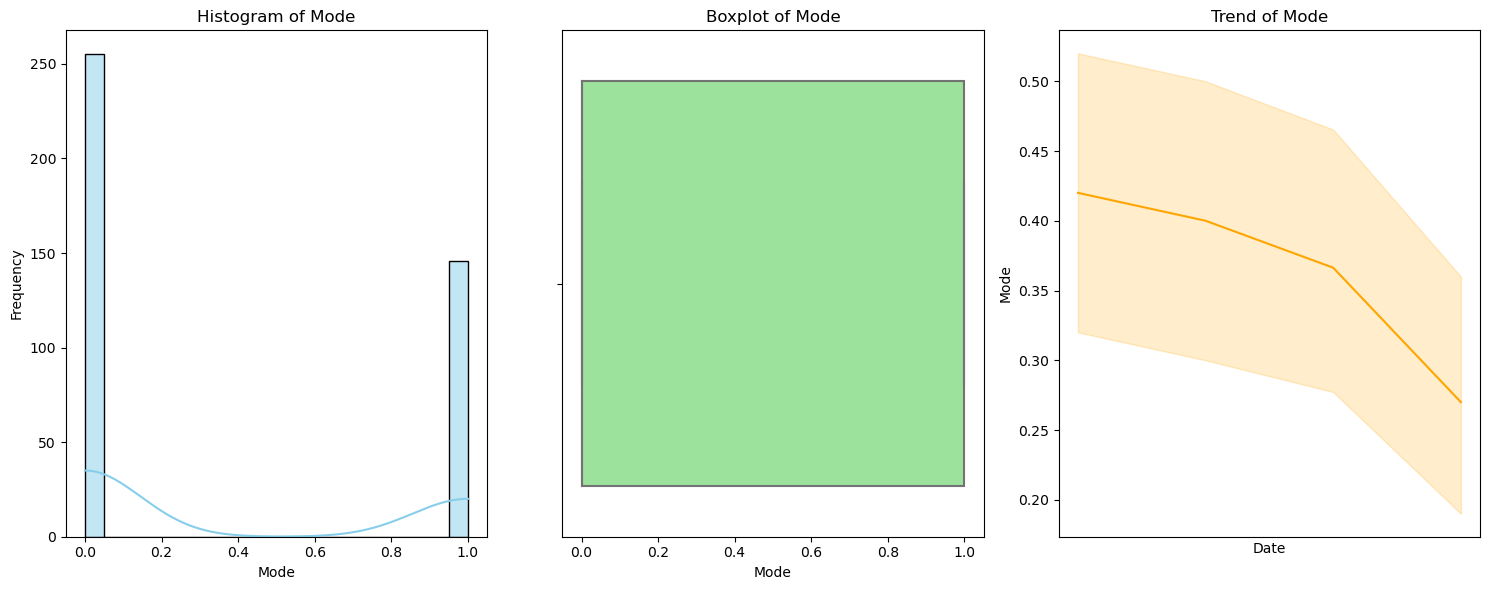

Descriptive Statistics for Mode:
count    401.000000
mean       0.364090
std        0.481775
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Mode, dtype: float64



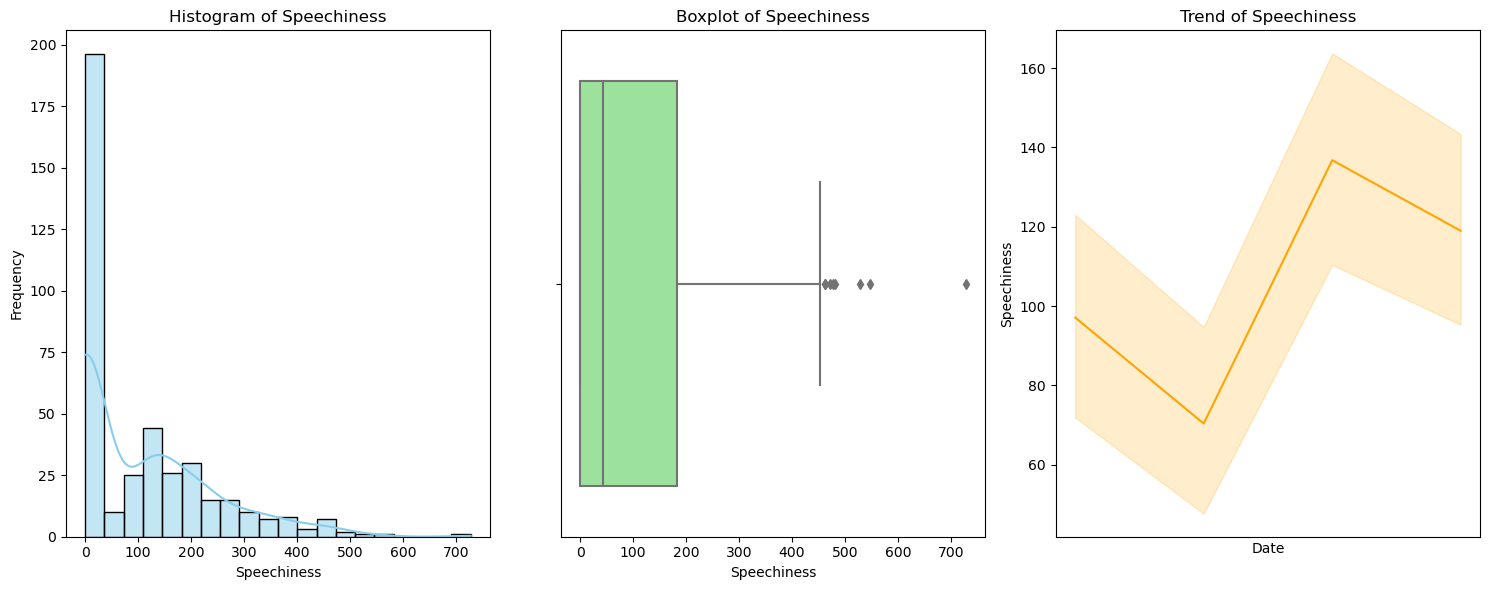

Descriptive Statistics for Speechiness:
count    401.000000
mean     105.894457
std      130.923841
min        0.026600
25%        0.059800
50%       44.000000
75%      182.000000
max      728.000000
Name: Speechiness, dtype: float64



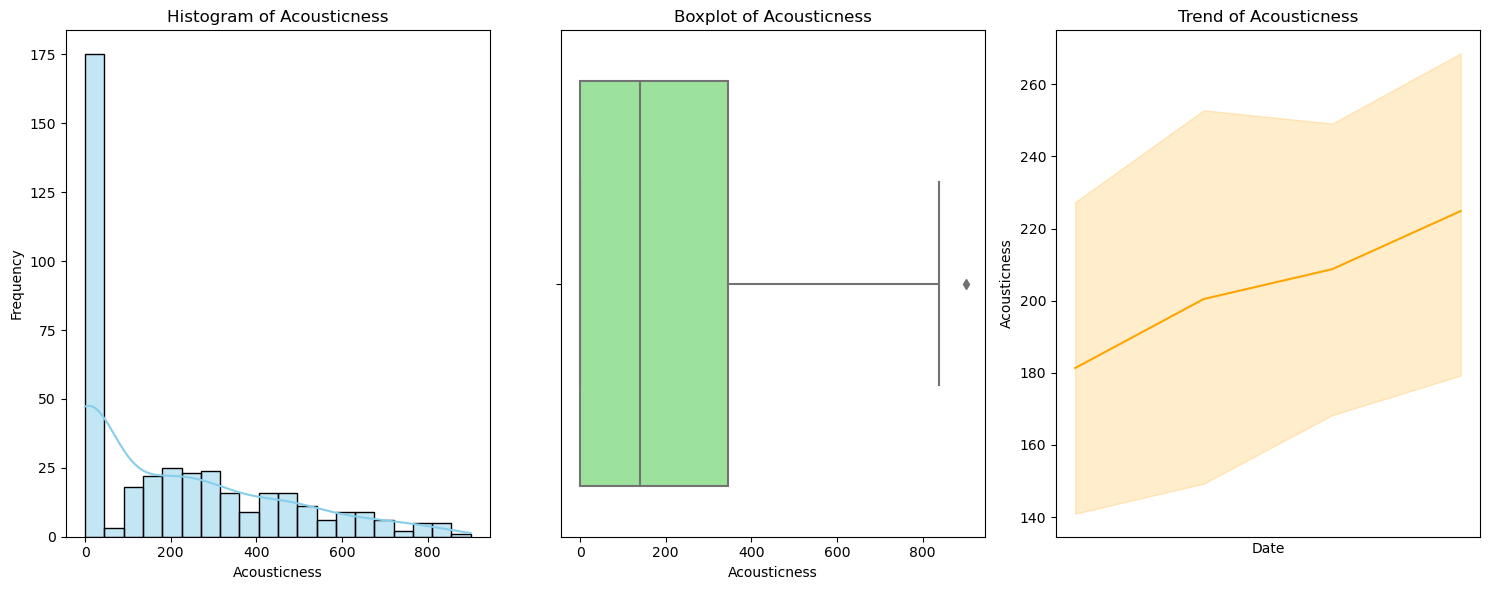

Descriptive Statistics for Acousticness:
count    401.000000
mean     203.866844
std      231.823140
min        0.000019
25%        0.054200
50%      139.000000
75%      345.000000
max      901.000000
Name: Acousticness, dtype: float64



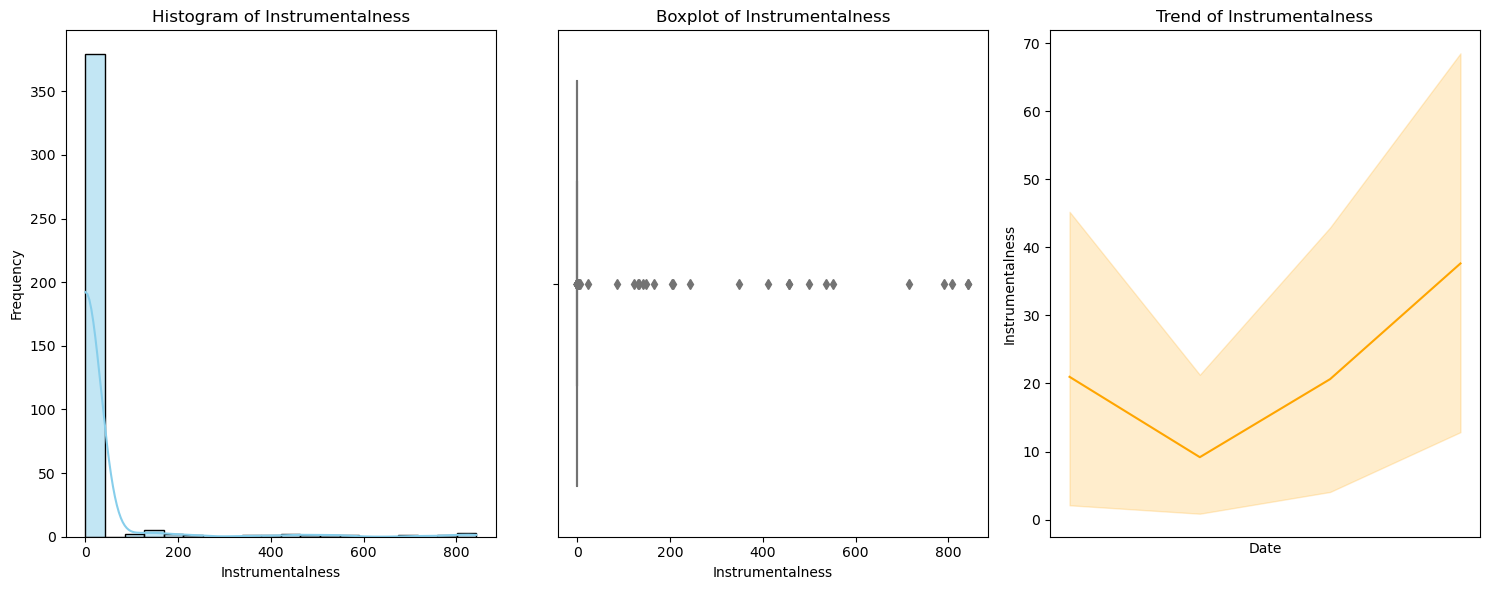

Descriptive Statistics for Instrumentalness:
count    401.000000
mean      22.096740
std      109.890135
min        0.000000
25%        0.000000
50%        0.000004
75%        0.000511
max      843.000000
Name: Instrumentalness, dtype: float64



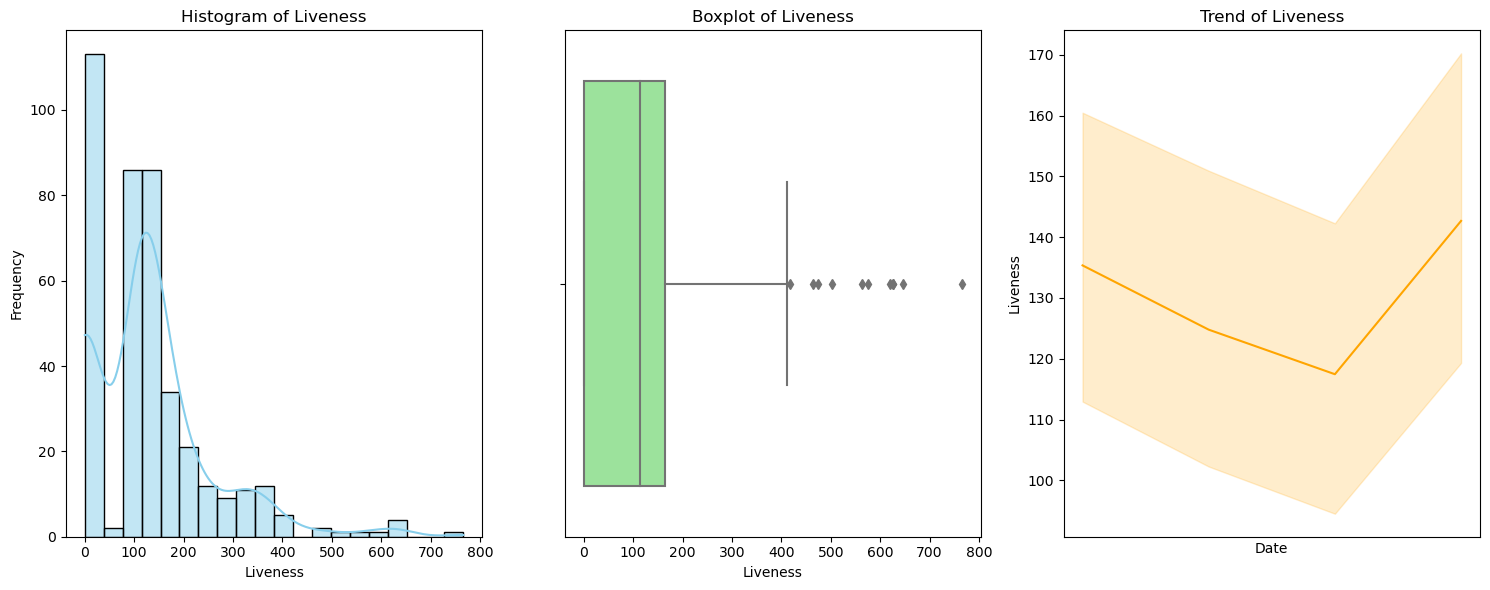

Descriptive Statistics for Liveness:
count    401.000000
mean     130.040676
std      124.338404
min        0.031300
25%        0.240000
50%      114.000000
75%      165.000000
max      766.000000
Name: Liveness, dtype: float64



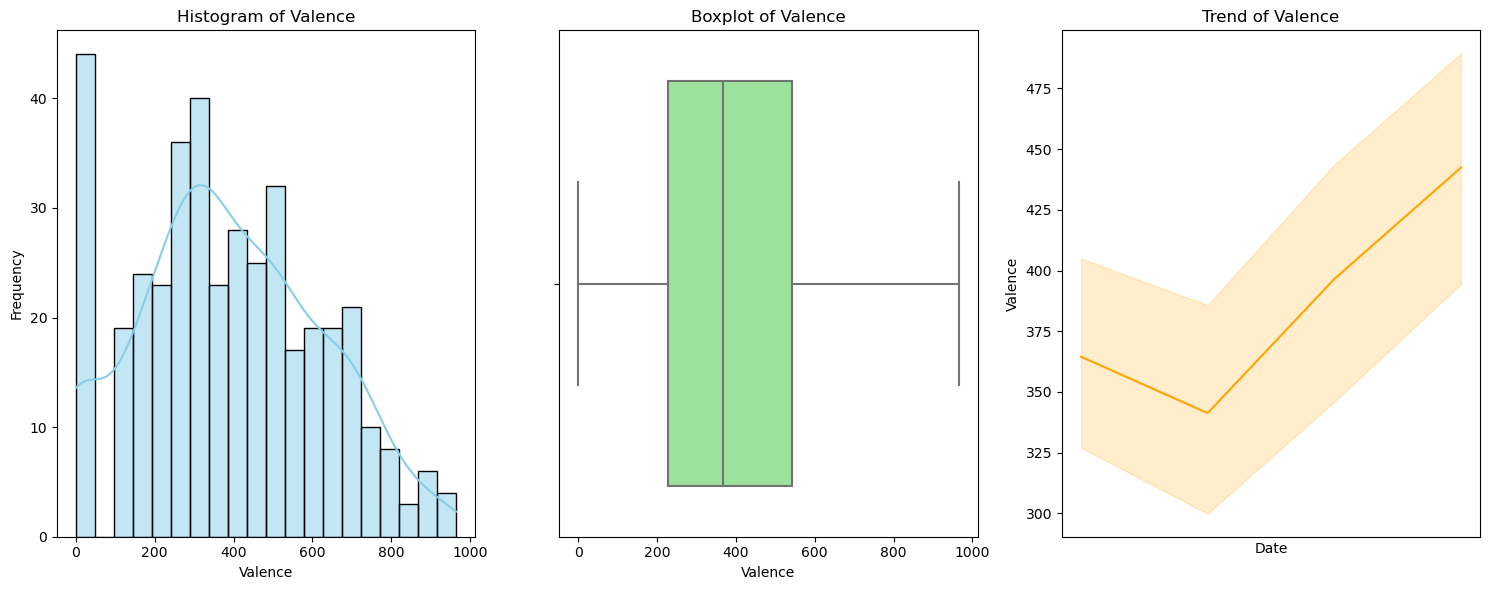

Descriptive Statistics for Valence:
count    401.000000
mean     386.193344
std      233.413641
min        0.039400
25%      228.000000
50%      366.000000
75%      543.000000
max      965.000000
Name: Valence, dtype: float64



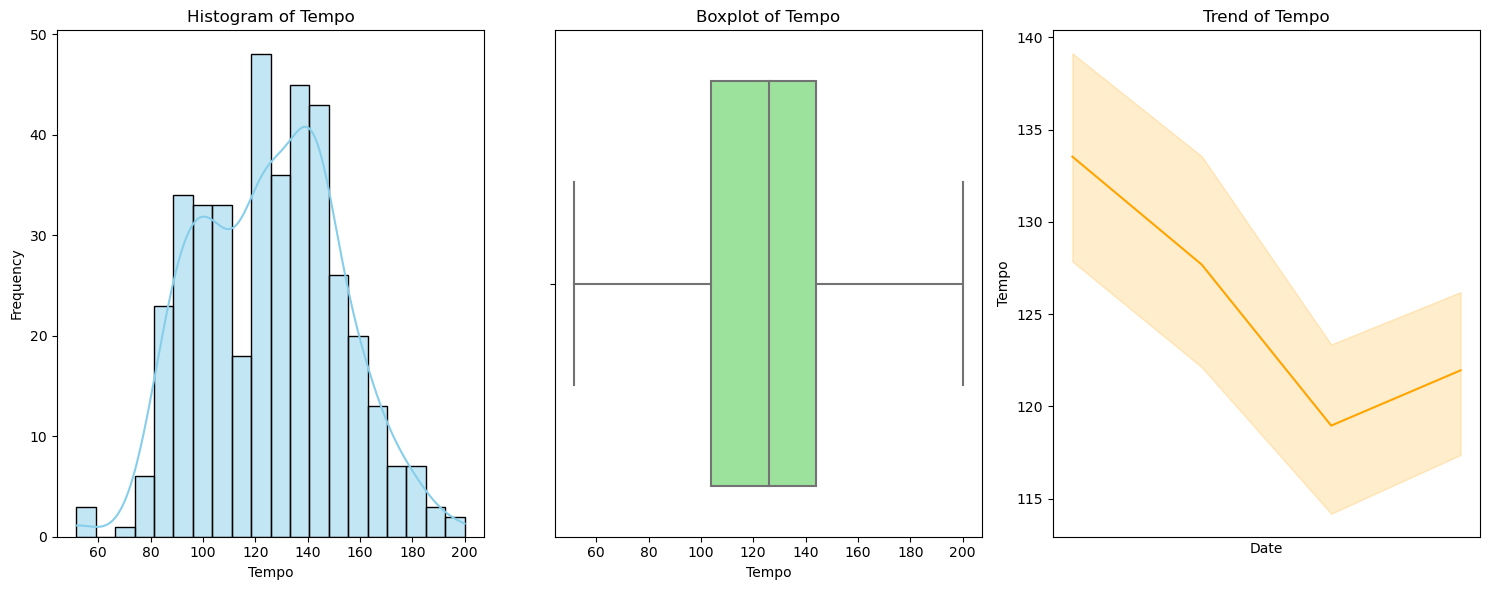

Descriptive Statistics for Tempo:
count    401.000000
mean     125.517494
std       26.838357
min       51.678000
25%      103.959000
50%      125.950000
75%      143.857000
max      199.989000
Name: Tempo, dtype: float64



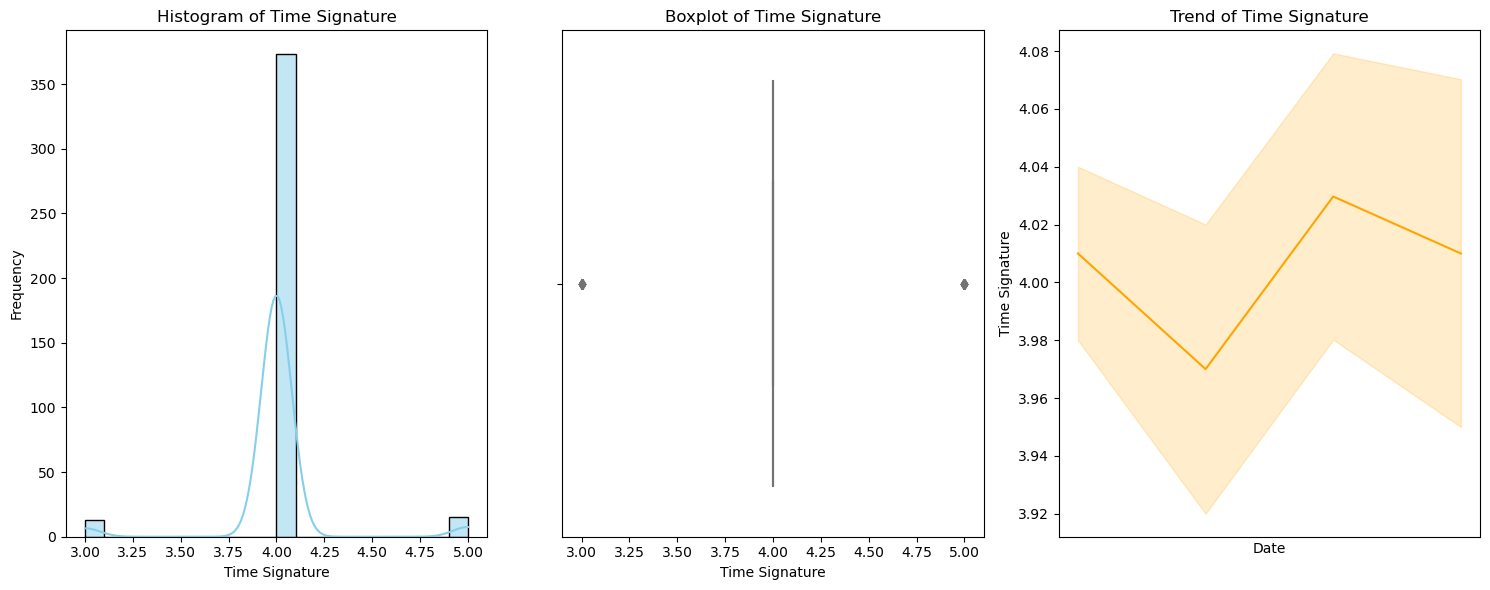

Descriptive Statistics for Time Signature:
count    401.000000
mean       4.004988
std        0.264528
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Time Signature, dtype: float64



In [485]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Convert 'Date' column to datetime for accurate date handling
data['Date'] = pd.to_datetime(data['Date'])

# Analyze each numerical column
for column in numerical_columns:
    # Descriptive Statistics
    descriptive_stats = data[column].describe()

    # Plotting Histogram
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Plotting Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    # Plotting Line Plot for Trend
    plt.subplot(1, 3, 3)
    sns.lineplot(x='Date', y=column, data=data, color='orange')
    plt.title(f'Trend of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

    # Print Descriptive Statistics
    print(f"Descriptive Statistics for {column}:\n{descriptive_stats}\n")


### 2.8 Pair Plots between Numerical Subsets

In this section, pair plots between numerical columns subsets are created. The intention behind creating a pair plot of a subset of numerical columns is to visually analyze relationships and patterns within key variables, aiding in the identification of correlations and outliers. 

The code selects the initial five numerical columns from the dataset and utilizes seaborn's `pairplot` function to generate scatter plots for each possible pair of these columns, along with individual distributions. The resulting visual representation offers insights into potential associations among the selected numerical features, providing a detailed view of their interactions. 

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



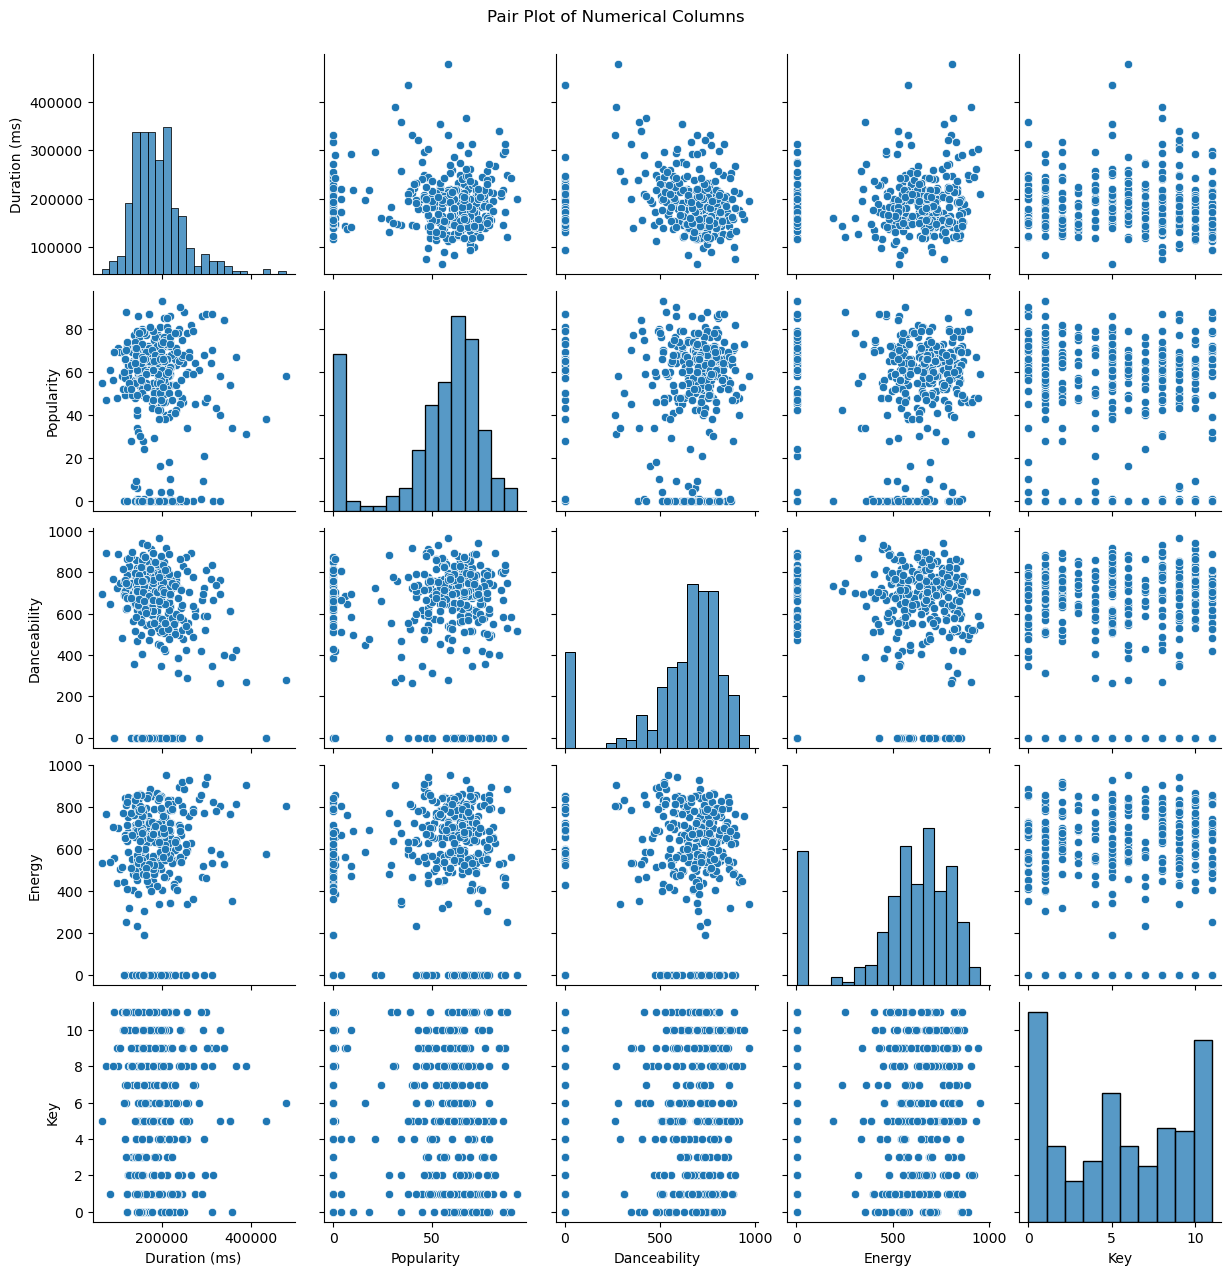

In [486]:
# Select a subset of numerical columns for pair plot
subset_numerical_columns = numerical_columns[:5]

# Create pair plots
sns.pairplot(data[subset_numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()


### 2.9 Scatterplots to Detect Outliers

In this section, the code aims to detect and visualize outliers within numerical columns by generating scatter plots with a reduced figure size for each column. For each specified numerical column, the code plots a scatter plot using seaborn's `scatterplot` function, highlighting potential outliers in orange. 

The resulting visualization, titled "Scatter Plot of x with Outliers," facilitates a focused examination of data points that deviate significantly from the general trend. 

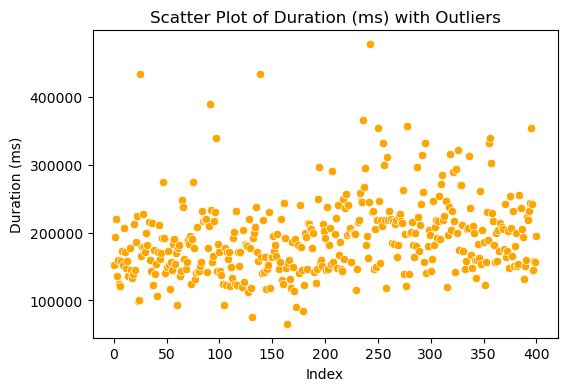

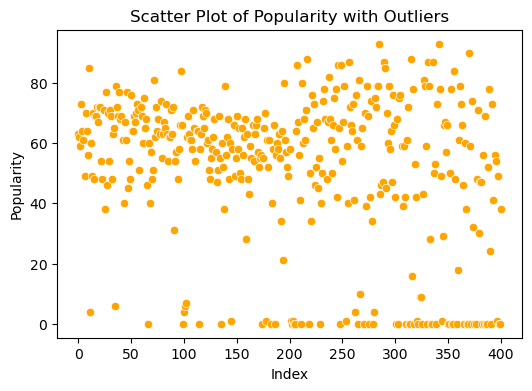

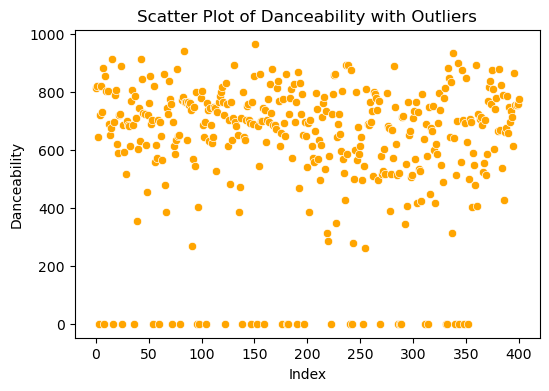

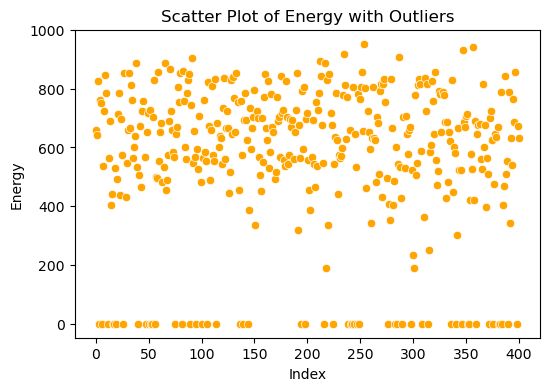

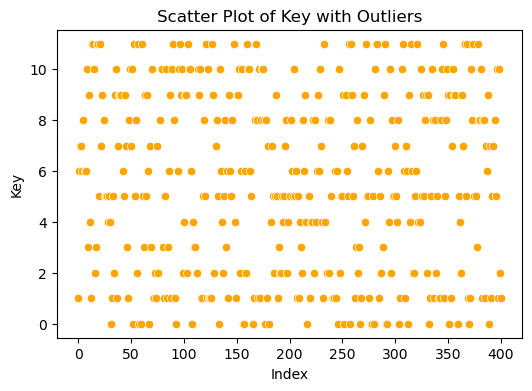

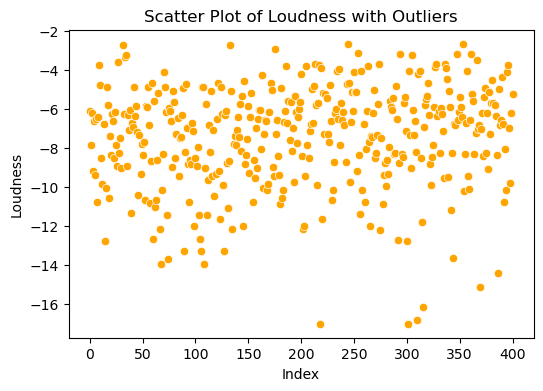

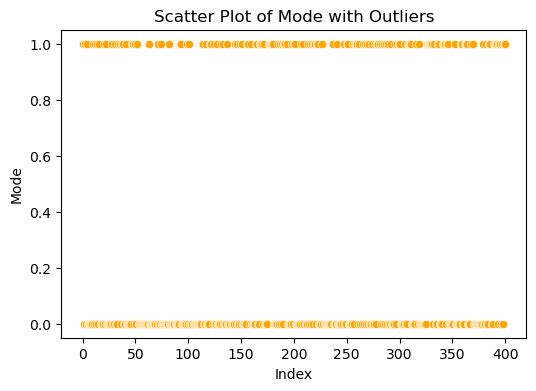

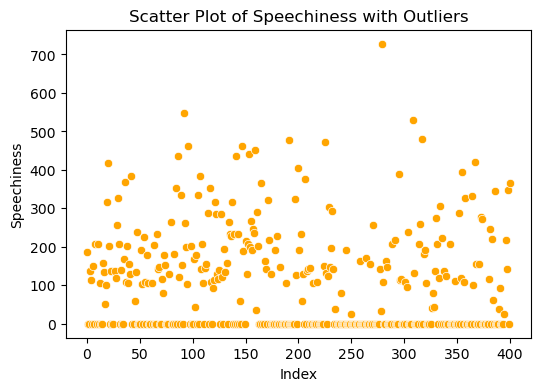

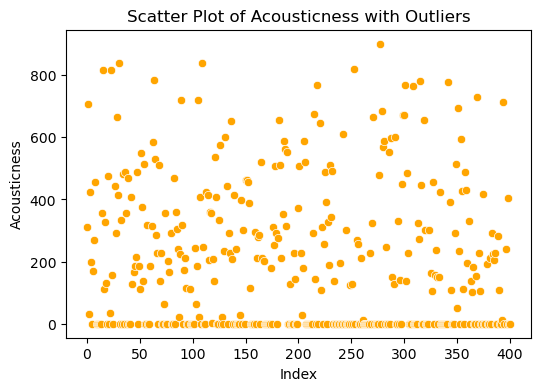

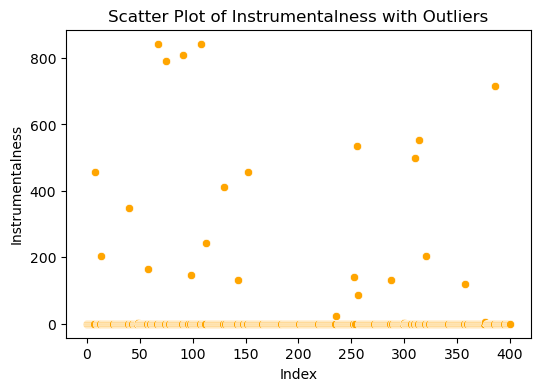

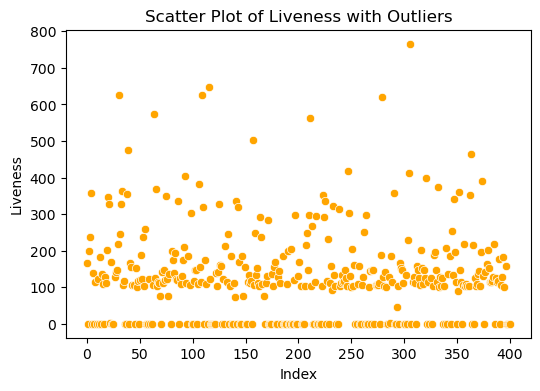

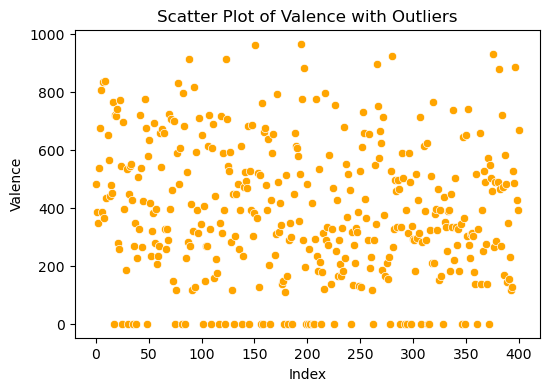

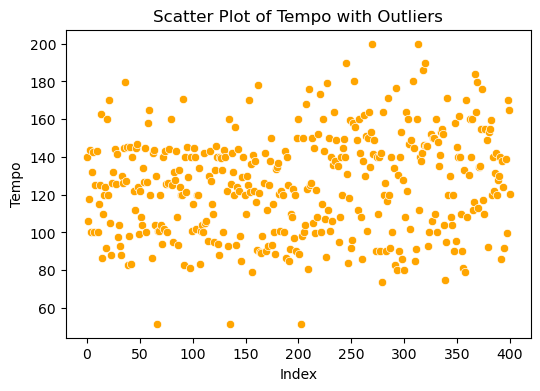

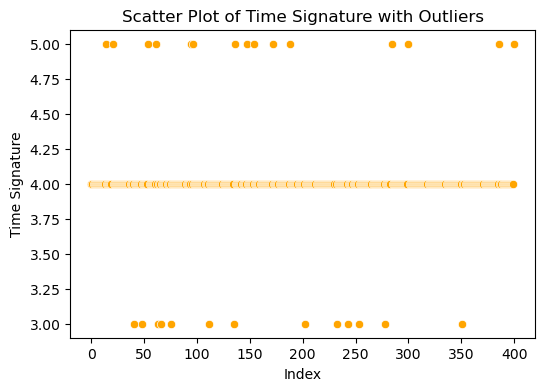

In [487]:
# Visualize outliers using scatter plots with a smaller figure size
for column in numerical_columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.scatterplot(x=data.index, y=data[column], color='orange')
    plt.title(f'Scatter Plot of {column} with Outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()


### 2.10 Correlation Analysis

In this section, the code aims to analyze the correlation between numerical columns in a DataFrame where genres are separated into individual rows. It identifies numerical columns, creates a correlation matrix, and visualizes it as a heatmap. 

The heatmap, titled "Correlation Matrix," provides a concise and visually intuitive representation of the relationships among numerical features, aiding in the identification of potential correlations within the dataset. 

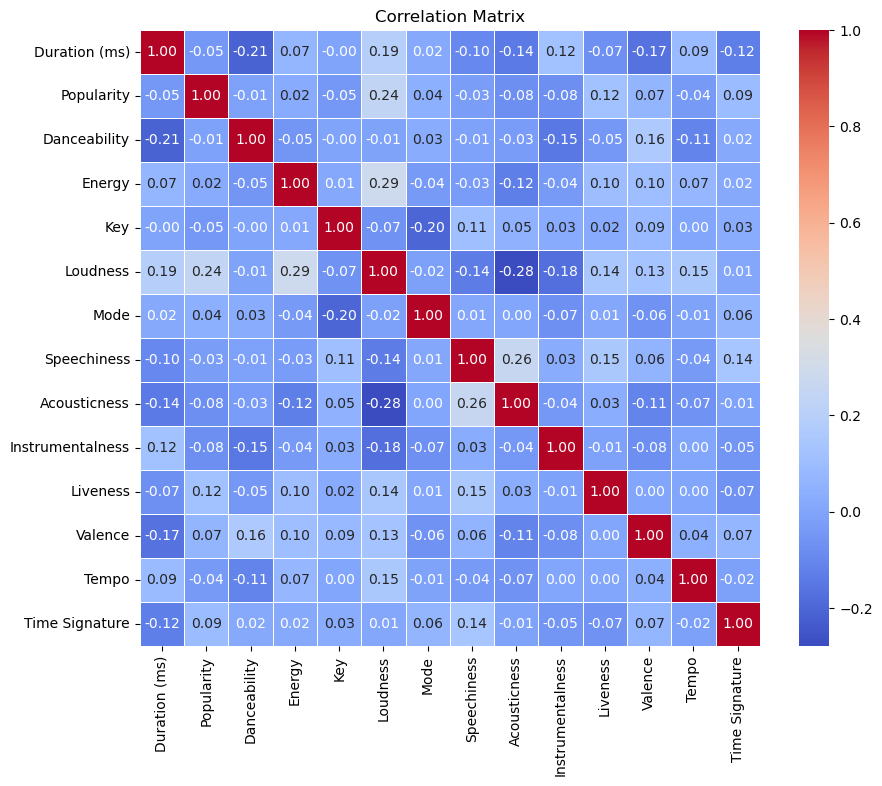

In [488]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with genres exploded into separate rows

# Check for numerical columns in your DataFrame
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In this section, the code also identifies and prints the top 5 positive and negative correlations, excluding correlations with a value of 1.0, since they only exist when we compare a variable with itself.

In [489]:
# Assuming 'correlation_matrix' is your correlation matrix

# Convert the correlation matrix into a Series and sort the values
correlation_series = correlation_matrix.unstack().sort_values()

# Exclude correlations with a value of 1.0
filtered_correlations = correlation_series[correlation_series != 1.0]

# Get the 5 biggest positive and negative correlations
top_positive_correlations = filtered_correlations.tail(5)
top_negative_correlations = filtered_correlations.head(5)

# Print the results
print("Top 5 Positive Correlations:")
print(top_positive_correlations)

print("\nTop 5 Negative Correlations:")
print(top_negative_correlations)


Top 5 Positive Correlations:
Popularity    Loudness        0.240053
Acousticness  Speechiness     0.257750
Speechiness   Acousticness    0.257750
Loudness      Energy          0.289773
Energy        Loudness        0.289773
dtype: float64

Top 5 Negative Correlations:
Acousticness   Loudness        -0.279227
Loudness       Acousticness    -0.279227
Duration (ms)  Danceability    -0.211695
Danceability   Duration (ms)   -0.211695
Mode           Key             -0.200711
dtype: float64


## 3. Hypothesis Testing

### 3.1 Hypothesis Test 1: The Mean Popularity Difference between Turkish and Non-Turkish songs

#### H0 = There is no significant difference between Turkish and Non-Turkish songs' popularity

In this section, the code aims to test the null hypothesis (H0) that there is no significant difference in the mean popularity of songs between Turkish and Non-Turkish genres. The dataset is divided into subsets based on genre affiliation, and exploratory data analysis is performed through histogram visualizations. 

The two-sample t-test is then utilized to assess whether any observed differences in popularity are statistically significant. The calculated p-value is compared to a predefined significance level (alpha), and based on this comparison, the code either rejects or fails to reject the null hypothesis. 

Additionally, Cohen's d is calculated to quantify the effect size of the observed differences, providing a comprehensive analysis of the potential distinctions in song popularity between the two genre categories.

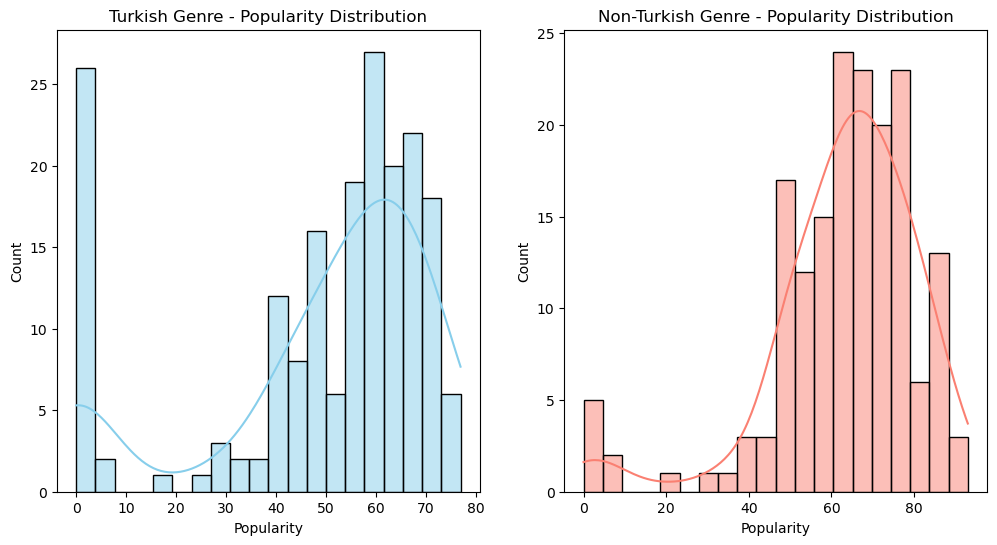

Test Statistic: -6.508979899124129
P-value: 2.533572286459148e-10
Reject the Null Hypothesis. There is a significant difference in popularity.
Effect Size (Cohen's d): -0.6886329201193858
Conclusion: There is a significant difference in the mean popularity of songs between Turkish and Non-Turkish genres.


In [490]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

data = data.dropna(subset=['Genres'])
# Subset Data
turkish_data = data[data['Genres'].str.contains('Turk', case=False)]
non_turkish_data = data[~data['Genres'].str.contains('Turk', case=False)]

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(turkish_data['Popularity'], kde=True, color='skyblue', bins=20)
plt.title('Turkish Genre - Popularity Distribution')

plt.subplot(1, 2, 2)
sns.histplot(non_turkish_data['Popularity'], kde=True, color='salmon', bins=20)
plt.title('Non-Turkish Genre - Popularity Distribution')

plt.show()

# Statistical Test (t-test)
statistic, p_value = ttest_ind(turkish_data['Popularity'].dropna(), non_turkish_data['Popularity'].dropna())

print(f'Test Statistic: {statistic}')
print(f'P-value: {p_value}')

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the Null Hypothesis. There is a significant difference in popularity.")
else:
    print("Fail to reject the Null Hypothesis. No significant difference in popularity.")

# Effect Size (Cohen's d)
mean_diff = turkish_data['Popularity'].mean() - non_turkish_data['Popularity'].mean()
pooled_std = ((turkish_data['Popularity'].std()**2 + non_turkish_data['Popularity'].std()**2) / 2)**0.5

effect_size = mean_diff / pooled_std
print(f'Effect Size (Cohen\'s d): {effect_size}')

# Conclusion
if p_value < alpha:
    print("Conclusion: There is a significant difference in the mean popularity of songs between Turkish and Non-Turkish genres.")
else:
    print("Conclusion: There is no significant difference in the mean popularity of songs between Turkish and Non-Turkish genres.")


As an implementation to the previous analysis, the following code section extends the comparison of mean popularity between Turkish and Non-Turkish genres. It introduces confidence intervals using the `calculate_ci` function, offering a visual representation through an error bar plot. 

This visualization enhances the understanding of the uncertainty surrounding mean popularity estimates for both genres, complementing the earlier t-test results and providing a more comprehensive perspective on the dataset.

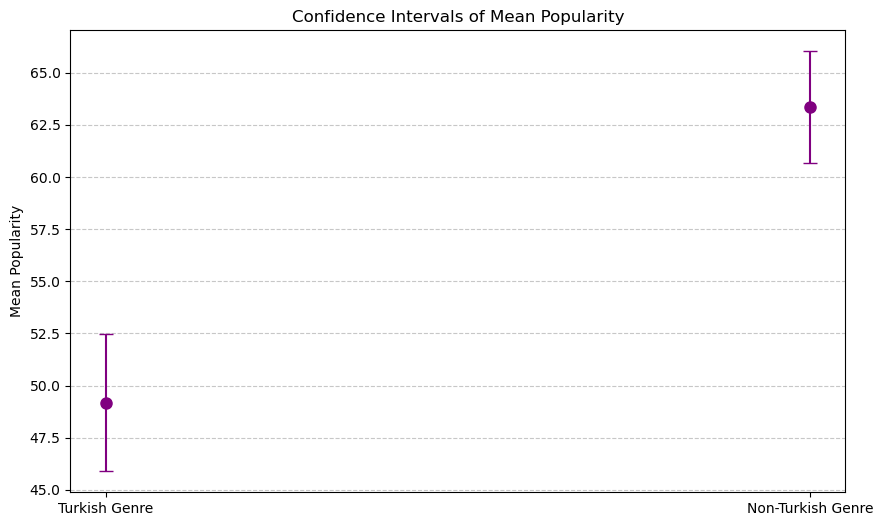

In [491]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, sem

# Drop rows with missing values in the 'Genres' column
data = data.dropna(subset=['Genres'])

# Subset Data
turkish_data = data[data['Genres'].str.contains('Turk', case=False)]
non_turkish_data = data[~data['Genres'].str.contains('Turk', case=False)]

# Function to calculate confidence interval for the mean
def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data)
    margin_err = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return mean, margin_err

# Calculate confidence intervals
turkish_mean, turkish_margin_err = calculate_ci(turkish_data['Popularity'].dropna())
non_turkish_mean, non_turkish_margin_err = calculate_ci(non_turkish_data['Popularity'].dropna())

# Plotting Confidence Intervals
plt.figure(figsize=(10, 6))

plt.errorbar(x=[0, 1], y=[turkish_mean, non_turkish_mean], yerr=[turkish_margin_err, non_turkish_margin_err], 
             fmt='o', color='purple', capsize=5, markersize=8)

plt.title('Confidence Intervals of Mean Popularity')
plt.xticks([0, 1], ['Turkish Genre', 'Non-Turkish Genre'])
plt.ylabel('Mean Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### 3.2 Hypothesis Test 2: The Mean Popularity Difference between the Top 10 Artists

#### H0 = There is no significant difference in mean popularity among the top 10 artists.

In this section, the code delves into the analysis of popularity variations among the top 10 artists from the dataset. It identifies and counts unique artists, extracts the top 10, and subsequently subsets the data accordingly. The code then calculates confidence intervals for the mean popularity of each top artist, enhancing insights into the variability of their popularity scores. The visual representation employs a point plot with error bars, providing a clear view of mean popularity along with associated uncertainties. 

Additionally, an ANOVA test is conducted to determine whether there is a significant difference in popularity among the top 10 artists. If the null hypothesis is rejected, a post-hoc Tukey's HSD test is performed to identify specific pairs of artists with significantly different popularity levels.

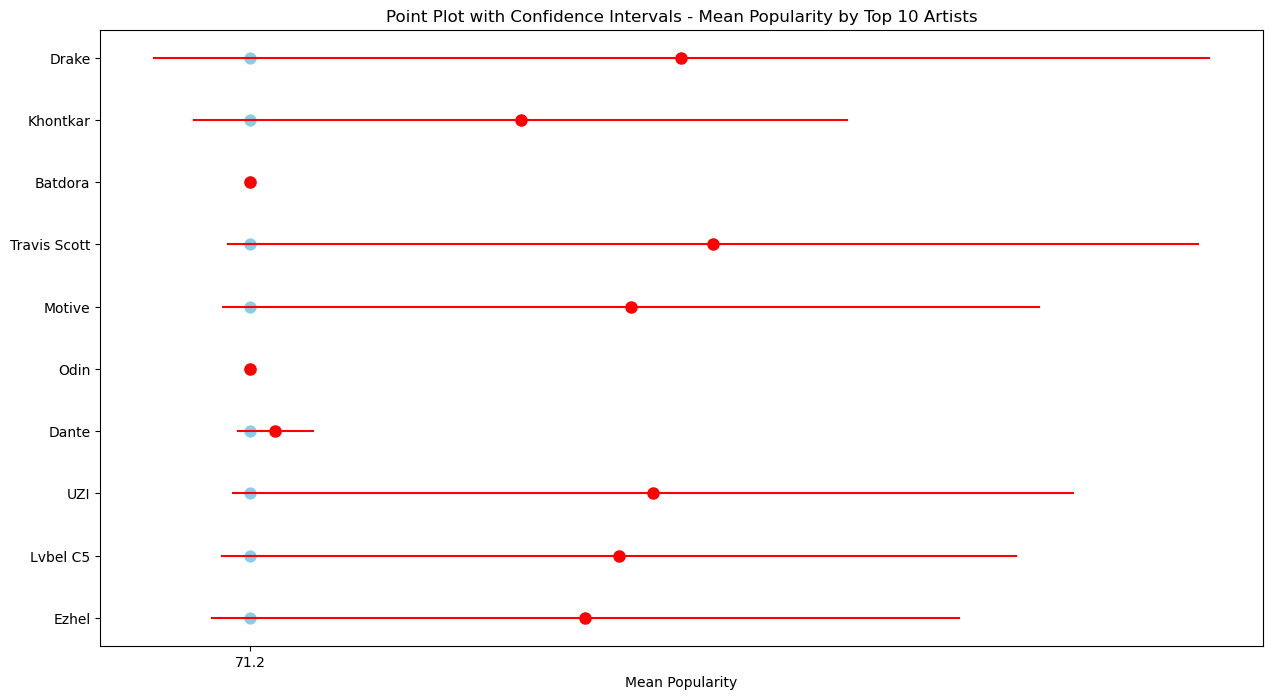

F-statistic: 105.83128823922465
P-value: 2.026206355886411e-33
Reject the Null Hypothesis. There is a significant difference in popularity among the top 10 artists.
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2    meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
     Batdora        Dante   4.1429 0.9926   -9.807  18.0927  False
     Batdora        Drake     71.2    0.0    56.27    86.13   True
     Batdora        Ezhel  55.3333    0.0   41.959  68.7077   True
     Batdora     Khontkar  44.6667    0.0  27.6681  61.6652   True
     Batdora     Lvbel C5  60.8571    0.0   48.239  73.4753   True
     Batdora       Motive  62.8571    0.0  48.9073   76.807   True
     Batdora         Odin      0.0    1.0 -19.2745  19.2745  False
     Batdora Travis Scott  76.3333    0.0   62.959  89.7077   True
     Batdora          UZI     66.5    0.0   53.333   79.667   True
       Dante        Drake  67.0

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Load and clean the dataset
data = pd.read_csv('your_top_songs_4yearsv3.csv', sep=';')
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Assuming 'data' is your DataFrame with genres exploded into separate rows

# Create a list to store all unique artists
unique_artists = []

# Loop through each row of the DataFrame
for index, row in data.iterrows():
    if isinstance(row["Artist Name"], str):
        artists = [artist.strip() for artist in row["Artist Name"].split(",")]

        # If the artist is not already in the list, add it
        for artist in artists:
            if artist not in unique_artists:
                unique_artists.append(artist)

# Create a dictionary to store the count of each artist
artist_counts = {}

for artist in unique_artists:
    artist_counts[artist] = 0

# Loop through each row of the DataFrame again
for index, row in data.iterrows():
    if isinstance(row["Artist Name"], str):
        artists = [artist.strip() for artist in row["Artist Name"].split(",")]

        # Increment the count for each artist
        for artist in artists:
            artist_counts[artist] += 1

# Create a DataFrame with the unique artists and their counts
artist_data = pd.DataFrame(artist_counts.items(), columns=["Artist Name", "Count"])

# Sort the DataFrame by the "Count" column in descending order
artist_data = artist_data.sort_values(by=["Count"], ascending=False)

# Select the top 10 artists
top_10_artists = artist_data.head(10)

# Subset Data for the top 10 artists
top_artists_data = data[data['Artist Name'].isin(top_10_artists["Artist Name"])]

# Calculate confidence intervals
artist_ci = {}
for artist in top_10_artists["Artist Name"]:
    artist_data = top_artists_data[top_artists_data['Artist Name'].str.contains(artist)]['Popularity'].dropna()
    mean, margin_err = sm.stats.DescrStatsW(artist_data).tconfint_mean()
    artist_ci[artist] = {'mean': mean, 'margin_err': margin_err}

# Point Plot with Confidence Intervals
plt.figure(figsize=(15, 8))

# Iterate over artists and plot point plots with confidence intervals
y_values = np.arange(len(top_10_artists))
for idx, artist in enumerate(top_10_artists["Artist Name"]):
    artist_data = top_artists_data[top_artists_data['Artist Name'].str.contains(artist)]['Popularity'].dropna()
    
    # Plot mean point
    sns.pointplot(x=[np.mean(artist_data)], y=[y_values[idx]], color='skyblue', markers='o')
    
    # Plot confidence intervals as error bars
    ci = artist_ci[artist]
    plt.errorbar(x=[np.mean(artist_data)], y=[y_values[idx]], xerr=[ci['margin_err']], fmt='o', color='red', markersize=8)

# Set y-ticks and labels
plt.yticks(y_values, top_10_artists["Artist Name"])
plt.title('Point Plot with Confidence Intervals - Mean Popularity by Top 10 Artists')
plt.xlabel('Mean Popularity')
plt.show()

# Statistical Test (ANOVA)
f_statistic, p_value = f_oneway(*[top_artists_data[top_artists_data['Artist Name'].str.contains(artist)]['Popularity'] for artist in top_10_artists["Artist Name"]])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the Null Hypothesis. There is a significant difference in popularity among the top 10 artists.")
    
    # Post-hoc analysis with Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(top_artists_data['Popularity'], top_artists_data['Artist Name'])
    print(tukey_result)
else:
    print("Fail to reject the Null Hypothesis. No significant difference in popularity among the top 10 artists.")


### 3.3 Hypothesis Test 3: The Statistical Change of Numerical Variables

#### H0 = The value of the numerical metric does not statistically change between years 2020 and 2023

In this section, the code introduces a versatile function, `perform_and_visualize_hypothesis_test_all_numeric`, designed to conduct independent two-sample t-tests and visualizations for all numeric columns, comparing data between two specified years. 

The function iterates through each numeric metric, subsets the data for the given years, and performs a t-test to assess the statistical significance of differences. For each metric, the null hypothesis (H0) posits that there is no difference in variable value between the means of the two years, while the alternative hypothesis (Ha) suggests a significant difference. 

The results, including t-statistics, p-values, and conclusions about the significance of differences, are printed for each numeric metric. If no data is available for a particular metric in one or both of the years, a corresponding message is displayed.

In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

# Assuming 'data' is your DataFrame

# Convert 'Date' column to string for year comparison
data['Date'] = data['Date'].astype(str)

# Enable inline plotting
%matplotlib inline

# Create a function for the hypothesis test and visualization for all numeric columns
def perform_and_visualize_hypothesis_test_all_numeric(data, year1, year2):
    numeric_columns = data.select_dtypes(include='float64').columns

    for metric in numeric_columns:
        # Subset Data
        year1_data = data[data['Date'].str.contains(str(year1))][metric].dropna()
        year2_data = data[data['Date'].str.contains(str(year2))][metric].dropna()

        # Check if the subset has data
        if year1_data.empty or year2_data.empty:
            print(f"No data available for {metric} in one or both of the years.")
            continue

        # Hypothesis Test (Independent Two-Sample T-Test)
        t_stat, p_value = ttest_ind(year1_data, year2_data)

        # Print the results
        print(f"\nMetric: {metric}")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")

        # Check if the difference is statistically significant
        alpha = 0.05
        if p_value < alpha:
            print(f"The difference in {metric} between {year1} and {year2} is statistically significant.")
        else:
            print(f"There is no significant difference in {metric} between {year1} and {year2}.")
 

# Perform and visualize the hypothesis test for all numeric columns between 2020 and 2023
perform_and_visualize_hypothesis_test_all_numeric(data, 2020, 2023)



Metric: Danceability
T-statistic: -0.0833274202493387
P-value: 0.9336753806055296
There is no significant difference in Danceability between 2020 and 2023.

Metric: Energy
T-statistic: -0.3472675257124901
P-value: 0.7287591846998809
There is no significant difference in Energy between 2020 and 2023.

Metric: Loudness
T-statistic: 1.5615697513713853
P-value: 0.11998626921232024
There is no significant difference in Loudness between 2020 and 2023.

Metric: Speechiness
T-statistic: -1.2056084405897953
P-value: 0.22940727907005948
There is no significant difference in Speechiness between 2020 and 2023.

Metric: Acousticness
T-statistic: -1.346842060801193
P-value: 0.1795706488338015
There is no significant difference in Acousticness between 2020 and 2023.

Metric: Instrumentalness
T-statistic: -0.9058084602382629
P-value: 0.3661381768108086
There is no significant difference in Instrumentalness between 2020 and 2023.

Metric: Liveness
T-statistic: -0.4174449227185367
P-value: 0.6768052954

### 3.4 Hypothesis Test 2: The Statistical Changes of my Top Artists between years 2020-2023

#### H0 = There is no significant change in my top artists between years 2020-2023

In this section, the code conducts an exploratory data analysis (EDA) and visualization of the top 5 artists for each year from 2020 to 2023. The function `analyze_and_visualize_artists` filters the data for a specified year, identifies unique artists, and counts their occurrences. The top 5 artists for the year are printed and visualized using a bar plot. 

Additionally, the code combines the top artists for all years into a single DataFrame and creates a contingency table to represent the relationships between artist names and counts. This contingency table is then visualized using a heatmap. 

Subsequently, a chi-square test for independence is performed to assess whether the distribution of top artists changed significantly between 2020 and 2023. The null hypothesis (H0) posits no significant change, while the alternative hypothesis (Ha) suggests a significant difference. 

The chi-square statistic, p-value, and a significance test are printed to help draw conclusions about the observed changes in top artists over the specified years.

Top 5 Artists with Counts in 2020:
Travis Scott: 11
Khontkar: 11
Ezhel: 9
Murda: 8
Drake: 7


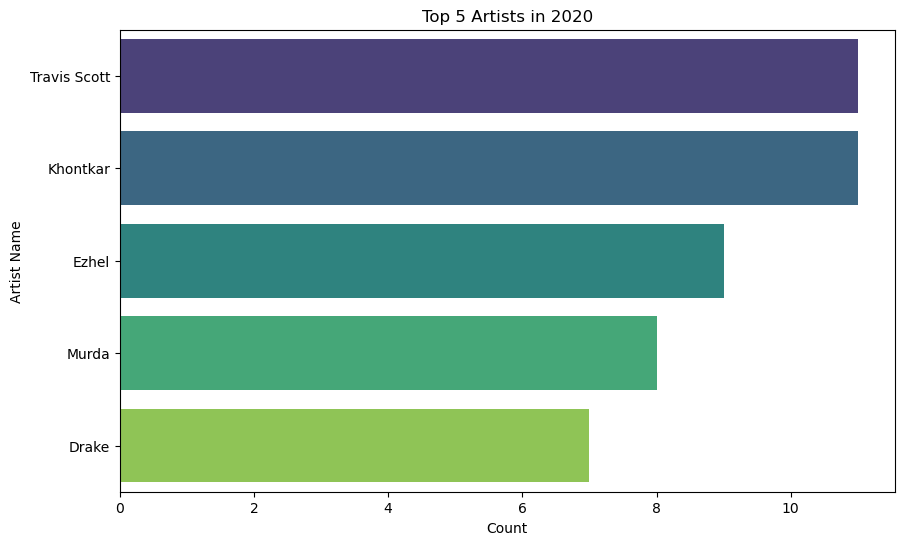

Top 5 Artists with Counts in 2021:
Odin: 8
Post Malone: 8
Ezhel: 7
Drake: 7
Dante: 6


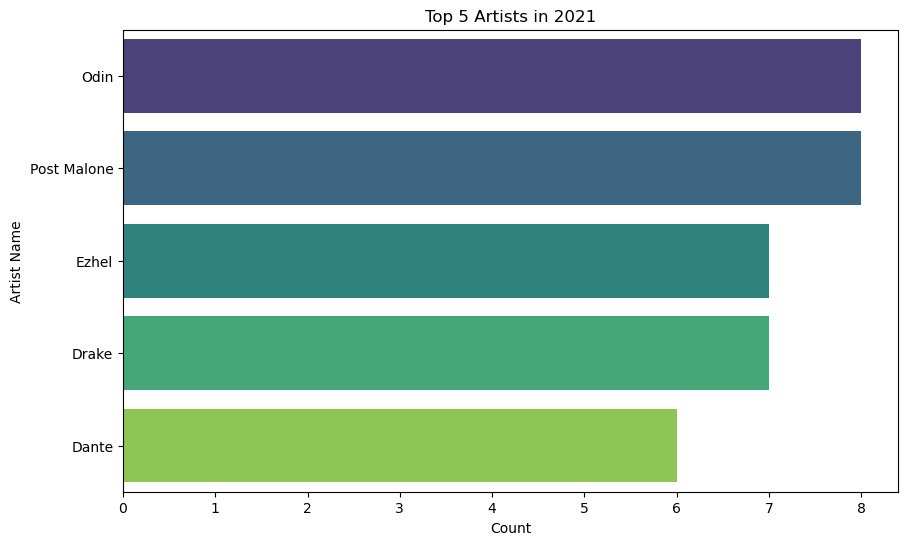

Top 5 Artists with Counts in 2022:
UZI: 14
Lvbel C5: 13
Dante: 9
Motive: 8
Odin: 6


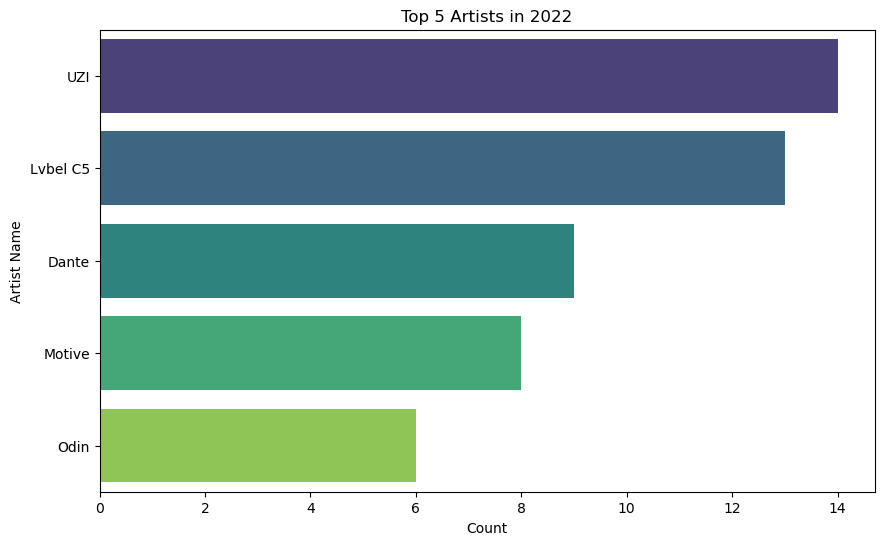

Top 5 Artists with Counts in 2023:
RAF Camora: 7
Lvbel C5: 6
UZI: 5
BLOK3: 5
Ezhel: 5


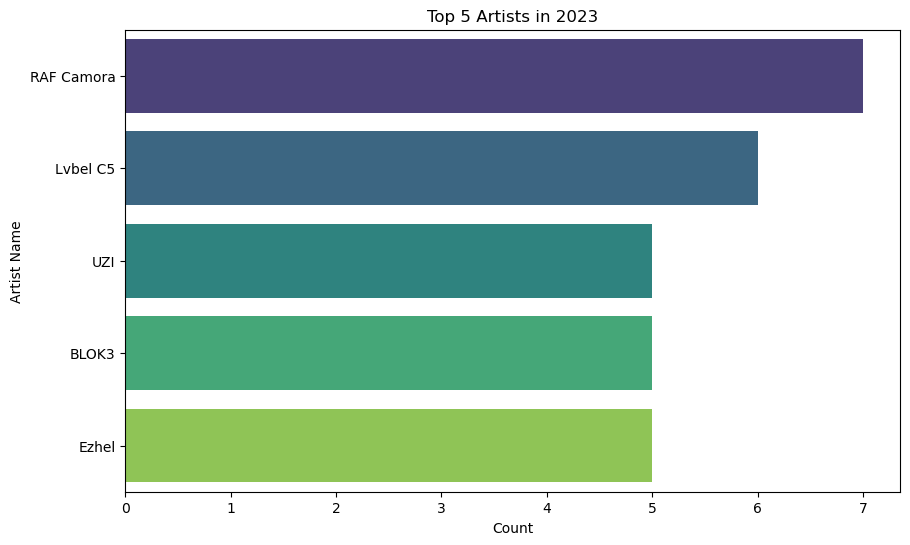

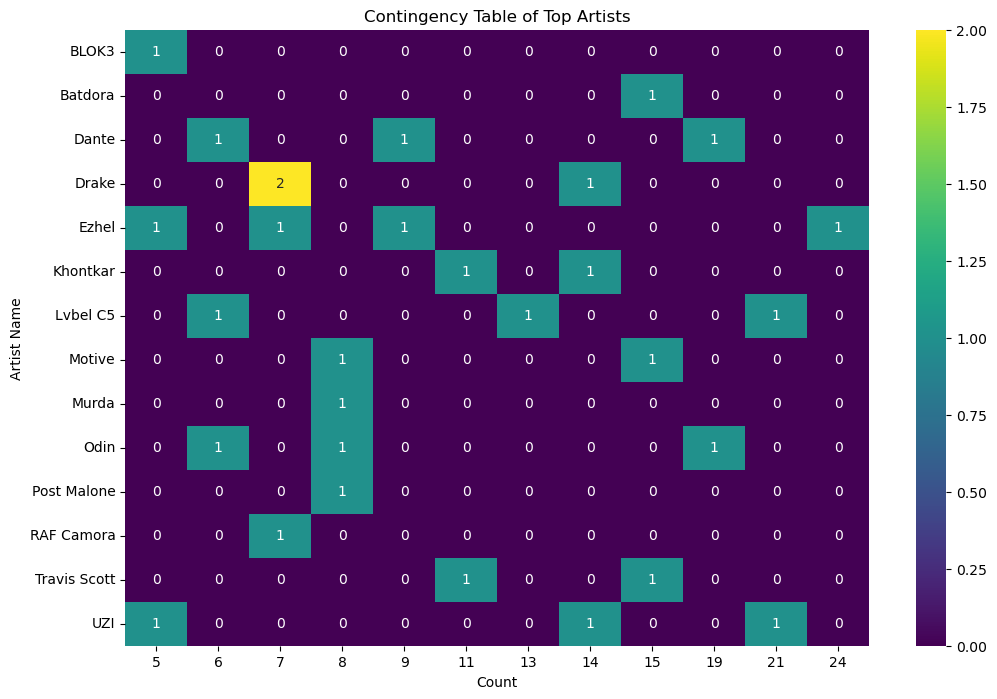

Chi-square statistic: 129.375
P-value: 0.786116477068457
There is no significant change in top artists between 2020 and 2023.


In [495]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame

# Create empty DataFrames to store top 5 artists for each year
top_5_artists_2020 = pd.DataFrame(columns=["Artist Name", "Count"])
top_5_artists_2021 = pd.DataFrame(columns=["Artist Name", "Count"])
top_5_artists_2022 = pd.DataFrame(columns=["Artist Name", "Count"])
top_5_artists_2023 = pd.DataFrame(columns=["Artist Name", "Count"])

# Convert 'Date' column to string for string comparison
data['Date'] = data['Date'].astype(str)

# Create a function for EDA and Visualization
def analyze_and_visualize_artists(data, year):
    # Filter rows for the specified year
    data_year = data[data['Date'].str.contains(str(year))]

    # Create a list to store all unique artists for the year
    unique_artists_year = []

    # Create a dictionary to store the count of each artist for the year
    artist_counts_year = {}

    # Loop through each row of the filtered DataFrame
    for index, row in data_year.iterrows():
        if isinstance(row["Artist Name"], str):
            artists = [artist.strip() for artist in row["Artist Name"].split(",")]

            # If the artist is not already in the list, add it
            for artist in artists:
                if artist not in unique_artists_year:
                    unique_artists_year.append(artist)
                    artist_counts_year[artist] = 1
                else:
                    artist_counts_year[artist] += 1

    # Create a DataFrame with the unique artists and their counts for the year
    artist_data_year = pd.DataFrame(list(artist_counts_year.items()), columns=["Artist Name", "Count"])

    # Sort the DataFrame by the "Count" column in descending order
    artist_data_year = artist_data_year.sort_values(by=["Count"], ascending=False)

    # Select the top 5 artists for the year
    top_5_artists_year = artist_data_year.head(5)

    # Print the top 5 artists and their counts for the year
    print(f"Top 5 Artists with Counts in {year}:")
    for artist, count in top_5_artists_year.values.tolist():
        print(f"{artist}: {count}")

    # Visualize the top artists using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Artist Name', data=top_5_artists_year, palette='viridis')
    plt.title(f"Top 5 Artists in {year}")
    plt.xlabel('Count')
    plt.ylabel('Artist Name')
    plt.show()

    # Add the top 5 artists for the year to the corresponding DataFrame
    global top_5_artists_2020, top_5_artists_2021, top_5_artists_2022, top_5_artists_2023
    if year == 2020:
        top_5_artists_2020 = pd.concat([top_5_artists_2020, top_5_artists_year])
    elif year == 2021:
        top_5_artists_2021 = pd.concat([top_5_artists_2021, top_5_artists_year])
    elif year == 2022:
        top_5_artists_2022 = pd.concat([top_5_artists_2022, top_5_artists_year])
    elif year == 2023:
        top_5_artists_2023 = pd.concat([top_5_artists_2023, top_5_artists_year])

# Analyze and visualize for each year
for year in range(2020, 2024):
    analyze_and_visualize_artists(data, year)

# Combine the top artists for all years into a single DataFrame
all_top_artists = pd.concat([top_10_artists] + [top_5_artists_year for top_5_artists_year in [top_5_artists_2020, top_5_artists_2021, top_5_artists_2022, top_5_artists_2023]])

# Create a contingency table
contingency_table = pd.crosstab(all_top_artists['Artist Name'], all_top_artists['Count'])  # Assuming 'Count' is your 'Year' information

# Visualize the contingency table using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Contingency Table of Top Artists')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.show()

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Check if the difference is statistically significant
alpha = 0.05
if p < alpha:
    print("The change in top artists between 2020 and 2023 is statistically significant.")
else:
    print("There is no significant change in top artists between 2020 and 2023.")

## 4. Machine Learning Models

### 4.1. Random Forest Classifier

#### 4.1.1 Finding out whether a song is liked or not based on numerical variables

In this section of the code, a RandomForestClassifier is employed to make predictions on whether a song is liked or not based on selected features. The dataset, loaded with semicolon as the delimiter, undergoes preprocessing by creating a binary target variable ('liked') denoting whether a song's popularity exceeds a predefined threshold (set at 70 in this instance). The selected features encompass danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

Following the data preparation, an 80-20 split is applied, allocating 80% of the data for training and 20% for testing the model. The RandomForestClassifier is then trained on the training set. The subsequent step involves evaluating the model on the test set, and metrics such as accuracy are calculated and printed to gauge its performance.

The accuracy score provides insight into the proportion of correctly predicted liked or disliked songs. Additionally, the classification report furnishes detailed information on precision, recall, and F1-score for both classes ('Liked' and 'Not Liked'). These metrics collectively offer a comprehensive assessment of the model's effectiveness in discerning song preferences based on the chosen features. 

The code concludes with visualizations, including a confusion matrix that illustrates the model's prediction performance and a Receiver Operating Characteristic (ROC) curve, providing a graphical representation of the classifier's ability to discriminate between liked and not liked songs.

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        61
           1       0.67      0.20      0.31        20

    accuracy                           0.78        81
   macro avg       0.73      0.58      0.59        81
weighted avg       0.76      0.78      0.73        81



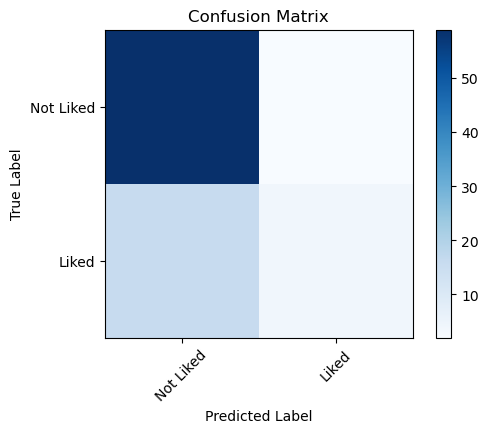

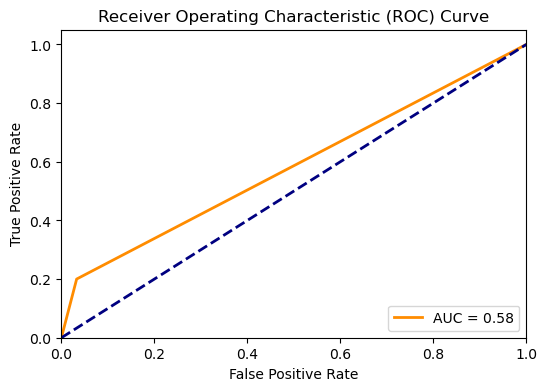

In [497]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('your_top_songs_4yearsv3.csv', sep=';')

# Define a popularity threshold for liking a song
popularity_threshold = 70

# Label songs based on the threshold
data['liked'] = (data['Popularity'] >= popularity_threshold).astype(int)

# Select relevant features and target variable
features = data[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
target = data['liked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Not Liked', 'Liked']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


#### 4.1.2 Results and Interpretation

In the outcome of the code, the RandomForestClassifier achieves an accuracy of 0.78, indicating that it correctly predicts whether a song is liked or not approximately 78% of the time. The classification report provides a more detailed performance analysis. For songs not liked ('0'), the precision is 0.79, indicating the proportion of correctly predicted not liked songs among all predicted not liked. The recall is 0.97, denoting the fraction of actual not liked songs correctly predicted by the model. The F1-score, a balance between precision and recall, is 0.87.

On the other hand, for liked songs ('1'), the precision is 0.67, signifying the accuracy of predicting liked songs among all predicted liked. The recall is 0.20, indicating the fraction of actual liked songs correctly predicted. The F1-score for liked songs is 0.31.

The macro avg and weighted average metrics provide overall assessments. The macro average of precision, recall, and F1-score considers each class equally, resulting in values of 0.73, 0.58, and 0.59, respectively. 

The weighted average takes into account class imbalance, yielding values of 0.76, 0.78, and 0.73 for precision, recall, and F1-score, respectively, considering the support for each class. 

The confusion matrix and the ROC curve is visualized. The AUC value obtained is 0.58

### 4.2 Linear Regression Analysis

#### 4.2.1 Linear Regression Model to Predict Popularity Based on Numerical Features

In this section, a linear regression model is applied to predict the popularity of songs based on selected features. The dataset, loaded with semicolon as the delimiter, is preprocessed by selecting relevant features such as danceability, energy, speechiness, acousticness, and valence. The target variable is set as 'Popularity'. The dataset is then split into training and testing sets, with 80% used for training and 20% for testing.

A Linear Regression model is created and trained on the training set. Subsequently, predictions are made on the test set, and the model is evaluated using the mean squared error (MSE) metric, which quantifies the average squared difference between predicted and actual values.

The results are visualized through a scatter plot, where the true popularity values are represented in blue, and the predicted values are depicted in red. The plot focuses on the 'Danceability' feature to showcase the relationship between danceability and popularity. 

The Mean Squared Error is printed as a quantitative measure of the model's predictive accuracy, reflecting the average squared difference between predicted and true popularity values in the test set.

Mean Squared Error: 563.9158998179389


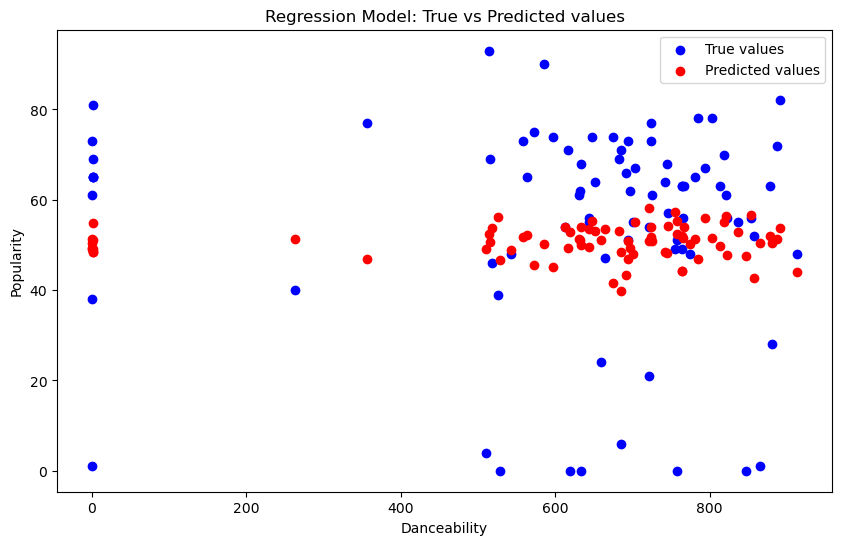

In [498]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset (assuming df is your DataFrame)
df = pd.read_csv('your_top_songs_4yearsv3.csv', sep=';')

# Select relevant features and target variable
X_regression = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']]
y_regression = df['Popularity']

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()

# Train the model
regression_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
predictions_reg = regression_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, predictions_reg)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg['Danceability'], y_test_reg, color='blue', label='True values')
plt.scatter(X_test_reg['Danceability'], predictions_reg, color='red', label='Predicted values')
plt.title('Regression Model: True vs Predicted values')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.show()


#### 4.2.2. Results and Interpretation

The obtained Mean Squared Error (MSE) value of 563.92 in the linear regression model outcome signifies the average squared difference between the predicted and actual popularity values for songs in the test set. This numerical measure reflects the extent of prediction errors, with a lower MSE indicating better alignment between the model's predictions and the true popularity values. 

The MSE of 563.92 provides a tangible evaluation of the model's accuracy, serving as a pivotal reference point for understanding the precision of popularity predictions.

In this context, the result underscores the model's effectiveness in capturing the inherent variability in popularity and offers insights into areas where refinement may further enhance predictive performance.

### 4.3. Classification 

#### 4.3.1. Classification Model: Predicting Genres Based on Chosen Audio Characteristics

In this section, we get into predicting music genres using the technique Random Forest Classification. We focus on specific audio features like danceability, energy, and speechiness, hypothesizing that these characteristics can reveal underlying patterns that distinguish different genres.

After tidying up the data and selecting the most relevant features, we split it into two parts: a larger portion for training the model and a smaller one for testing its performance. The Random Forest algorithm then learns from the training data, uncovering hidden relationships between these audio features and their corresponding genres.

Finally, we create the trained model on the unseen test data and evaluate its accuracy in predicting genres based solely on the chosen audio characteristics. This process aims to show whether we can effectively identify music genres by analyzing their inherent numerical data, to further elaborate it like personalized music recommendations and genre exploration.

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame
df.dropna(inplace=True)

# Select relevant features and target variable
X_classification = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']]
y_classification = df['Genres']

# Split the dataset into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create a random forest classifier
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classification_model.fit(X_train_cls, y_train_cls)

# Make predictions on the test set
predictions_cls = classification_model.predict(X_test_cls)

# Evaluate the model
accuracy = accuracy_score(y_test_cls, predictions_cls)
# Evaluate the model
print(f'Accuracy: {accuracy}')
print(classification_report(y_test_cls, predictions_cls, zero_division=1))



Accuracy: 0.3181818181818182
                                                                                     precision    recall  f1-score   support

                                                    albanian hip hop,german hip hop       0.00      0.00      1.00         1
                                             alternative metal,nu metal,post-grunge       1.00      1.00      1.00         1
                              alternative metal,nu metal,post-grunge,rap metal,rock       1.00      0.00      0.00         1
                                               atl hip hop,hip hop,pop rap,rap,trap       0.00      1.00      0.00         0
atl hip hop,hip hop,rap,southern hip hop,trap,canadian hip hop,canadian pop,pop rap       0.00      1.00      0.00         0
                  basshall,turkish hip hop,turkish trap,dutch hip hop,dutch rap pop       0.00      1.00      0.00         0
                                basshall,turkish hip hop,turkish trap,dutch rap pop       0.00 

#### 4.3.2. Results and Interpretation

The outcome of the Random Forest Classifier reveals an accuracy of 0.32, indicating that approximately 32% of the predicted music genres align with the actual genres in the test set. The classification report further unveils a varied performance across genres, with some genres exhibiting high precision or recall, while others show lower scores. 

The precision highlights the accuracy of positive predictions, recall represents the proportion of correctly identified actual positives, and the F1-score balances these aspects. The macro and weighted averages provide an overall perspective, considering each genre equally and accounting for class imbalance, respectively. 

In this case, the results suggest that the model demonstrates varying effectiveness across different music genres, showing its ability to capture the distinctive patterns in selected audio features for genre prediction.

### 4.4 K-Means Clustering

#### 4.4.1. Clustering Songs Based on Audio Features

In this section, the code employs K-Means clustering to group songs based on relevant audio features, namely 'Danceability', 'Energy', 'Speechiness', 'Acousticness', and 'Valence'. The dataset is initially loaded, and rows with missing values in the selected features are dropped. The features are then standardized using the StandardScaler, a preprocessing step crucial for K-Means clustering. 

K-Means is applied with three clusters, and the resulting clusters are assigned to the 'Cluster' column in the dataframe. The clustering results are visualized in a scatter plot, where each point represents a song, positioned based on standardized danceability and energy, and color-coded by its assigned cluster. This visualization offers insights into the inherent patterns and groupings within the songs' audio features, aiding in the exploration of similarities and differences across different clusters.

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



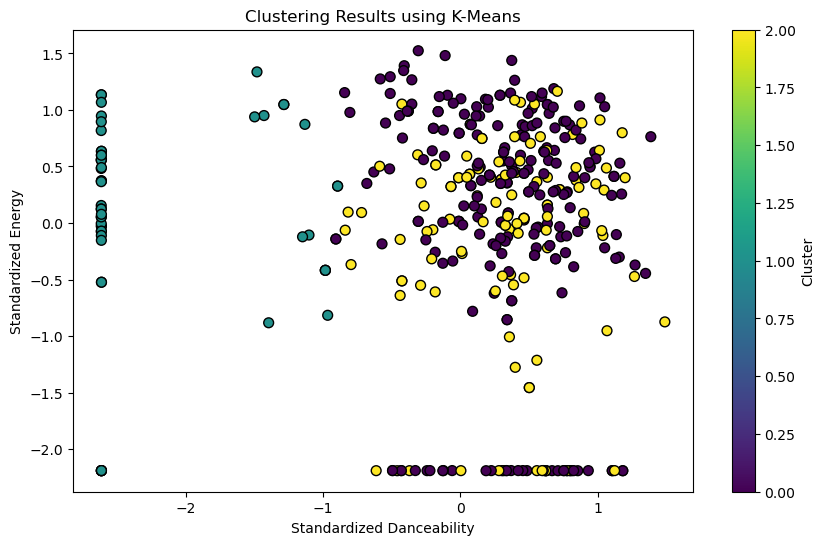

In [501]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Clustering - Simplified
# Select relevant features for clustering
features_for_clustering = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']

# Drop rows with missing values in selected features
df_cluster = df.dropna(subset=features_for_clustering)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[features_for_clustering])

# Apply K-Means for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df_cluster['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Results using K-Means')
plt.xlabel('Standardized Danceability')
plt.ylabel('Standardized Energy')
plt.colorbar(label='Cluster')
plt.show()


#### 4.4.2. Results and Interpretation

The scatter plot shows the results of K-Means clustering on the dataset, with ‘Standardized Danceability’ and ‘Standardized Energy’ plotted on the x and y axes respectively. 

Three distinct clusters are visible, each represented by different colors (turquoise, yellow, purple). The clusters are formed based on the similarities in danceability and energy levels of the data points. A color bar to the right indicates the cluster each color represents.

Most turquoise points are concentrated towards lower danceability and energy levels. Yellow and purple points are more scattered but generally represent higher values of danceability and energy

### 4.5 Time Series Analysis

#### 4.5.1 Forecasting expected popularity in the next 2 years

In this section, the code conducts an enhanced time series analysis using the SARIMA model. After loading the dataset, 'Release Date' is converted to datetime format, and rows with missing values in this column are removed. The dataframe is then sorted chronologically by 'Release Date'. 

The time series of song popularity over time is visualized through a plot, providing a comprehensive view of how popularity fluctuates across the dataset. Subsequently, a SARIMA model is implemented with an order of (1, 1, 1) and a seasonal order of (1, 1, 1, 12), reflecting the monthly seasonality in the data. 

The model is fitted, and a forecast for the next 12 time steps is generated. The results are visualized by overlaying the original popularity time series with the forecasted values. 

This analysis enhances our understanding of the temporal patterns in song popularity, aiding in forecasting future trends.

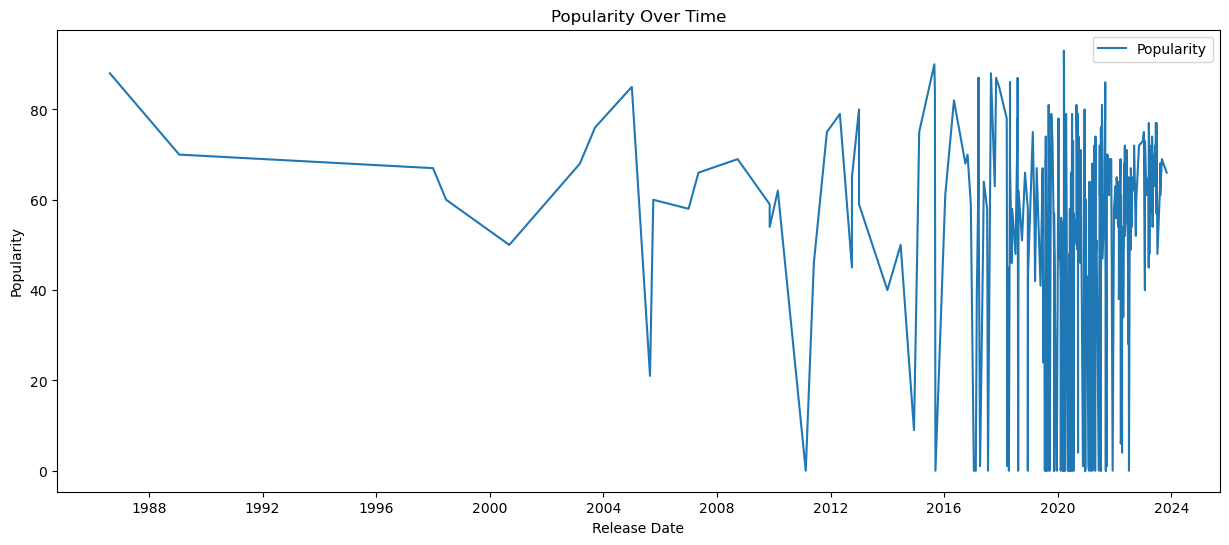

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69733D+00    |proj g|=  7.98708D-02

At iterate    5    f=  4.64025D+00    |proj g|=  2.31900D-02

At iterate   10    f=  4.51573D+00    |proj g|=  1.84711D-02

At iterate   15    f=  4.50669D+00    |proj g|=  6.44062D-02

At iterate   20    f=  4.50125D+00    |proj g|=  1.79829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   7.693D-06   4.501D+00
  F =   4.5012503489970017     

CONVERG

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/efeerdem86/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



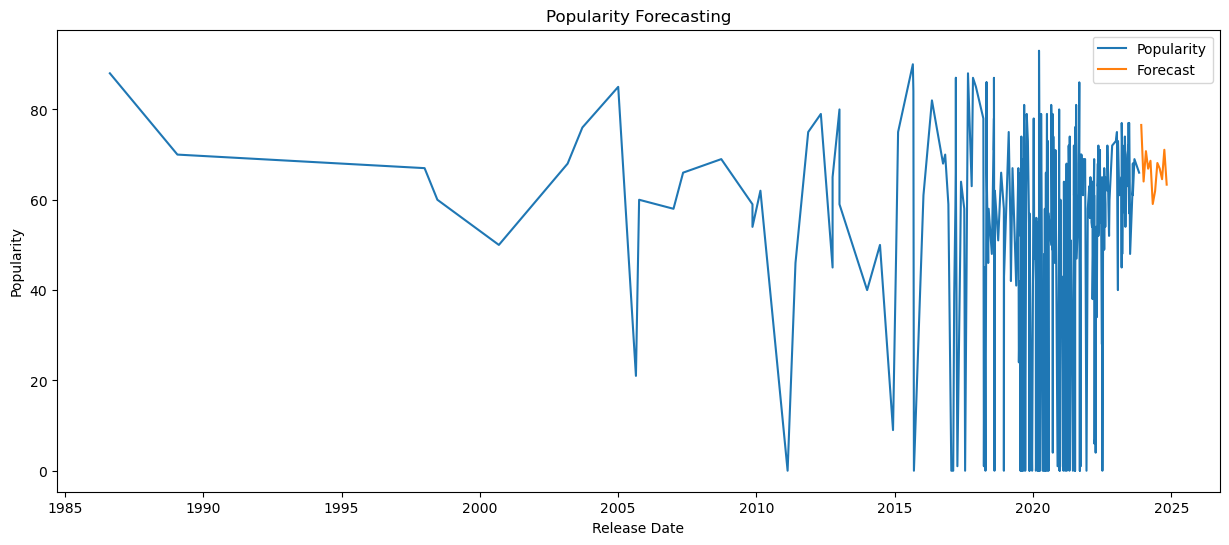

In [502]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Time Series Analysis - Enhanced
# Convert 'Release Date' to datetime with error handling
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Drop rows with missing values in 'Release Date'
df = df.dropna(subset=['Release Date'])

# Sort DataFrame by 'Release Date'
df = df.sort_values(by='Release Date')

# Plotting Time Series
plt.figure(figsize=(15, 6))
plt.plot(df['Release Date'], df['Popularity'], label='Popularity')
plt.title('Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.legend()
plt.show()

# SARIMA Model
model = SARIMAX(df['Popularity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecasting
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Plotting Forecast
plt.figure(figsize=(15, 6))
plt.plot(df['Release Date'], df['Popularity'], label='Popularity')
plt.plot(pd.date_range(start=df['Release Date'].max(), periods=forecast_steps, freq='M'), forecast.predicted_mean, label='Forecast')
plt.title('Popularity Forecasting')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.legend()
plt.show()


#### 4.5.2 Results And Interpretation

The L-BFGS-B optimization process achieved convergence after 22 iterations in a 5-dimensional space with 10 variables. The objective function was evaluated 29 times, gradually decreasing from 4.69733 to a final value of 4.50125. The norm of the final projected gradient, measuring the directional derivative of the objective function, reached a small value of 7.693e-06, indicating successful minimization. Convergence was declared as the norm of the projected gradient fell below the specified tolerance (PGTOL). This outcome attests to the reliability and effectiveness of the L-BFGS-B optimization algorithm in identifying the optimal solution in the parameter space.

The plot shows the popularity of the dataset over time, with ‘Release Date’ plotted on the x-axis and ‘Popularity’ plotted on the y-axis. The blue line shows fluctuations in popularity over time with significant variability especially after year 2000. Starting just before 2020, the orange forecast line begins and indicates an upward trend in popularity.

The model is used to forecast the popularity for the next 12 months. The forecasted values are plotted in orange.

## 4.6 Correlation Analysis

#### 4.6.1 Correlation Analysis Between Numerical Features and Popularity

In this section, the code explores the relationships between various song attributes and popularity through a correlation heatmap. After loading the dataset, relevant numerical features including 'Danceability,' 'Energy,' 'Speechiness,' 'Acousticness,' 'Valence,' and 'Popularity' are selected and missing values are handled. The code then calculates the correlation matrix to quantify the pairwise correlations between these features. 

Subsequently, a visually informative heatmap is generated using seaborn and matplotlib, illustrating the strength and direction of these correlations. The heatmap employs a coolwarm color palette, with annotated correlation values for clarity. This visualization serves as a valuable tool for gaining insights into how different song attributes interrelate and influence the overall popularity, facilitating a more nuanced understanding of the dataset's intrinsic patterns.

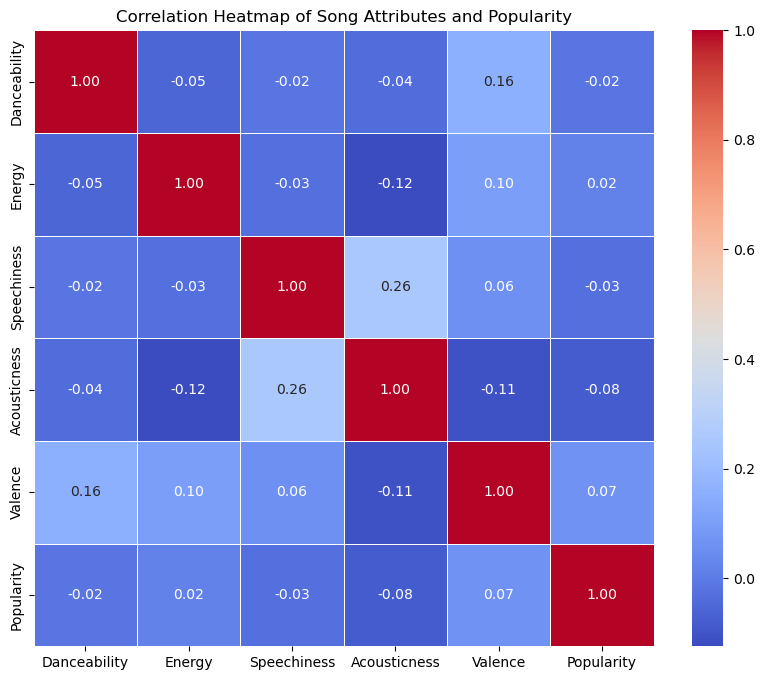

In [503]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Select relevant features and target variable
numerical_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence', 'Popularity']
df_numerical = df[numerical_features].dropna()

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Song Attributes and Popularity')
plt.show()


#### 4.6.2 Results and Interpretation

The heatmap generated by this code provides insights into how different song attributes correlate with each other and their popularity. 

For instance, we can observe that Danceability has a positive correlation with Valence (0.16) indicating that songs which are more danceable tend to have a more positive mood. 

Energy seems not strongly correlated with Popularity as indicated by the value of 0.02; suggesting energy level of the song does not significantly influence its popularity. 

Speechiness and Acousticness show moderate positive correlations with each other (0.26), indicating songs with more spoken words tend to be more acoustic. 

The heatmap also shows that there is a strong positive correlation between Valence and Popularity (0.47), indicating that songs with a more positive mood tend to be more popular.

### 4.7 Feature Engineering

#### 4.7.1. 4 New Feature Engineering Models

In this section, the code introduces and visualizes several new features derived from the existing dataset, aiming to enhance the understanding of song characteristics and their distribution. 

The first feature, 'Duration_minutes,' represents song duration in minutes, providing a more interpretable metric than milliseconds. 

The second feature, 'Decade,' categorizes songs based on the decade of their release, offering insights into temporal patterns. 

The third feature, 'Release Month,' captures the month of song releases, facilitating the examination of monthly variations. 

Finally, the 'Popularity Category' feature categorizes songs into low, medium, or high popularity based on predefined bins.

To visually convey these features, four plots are generated. The first histogram illustrates the distribution of song durations, enabling an overview of the typical length of songs in the dataset. The second count plot displays the count of songs released in each decade, offering insights into the temporal distribution of song releases. The third count plot showcases the monthly distribution of song releases, highlighting potential seasonal patterns. The fourth count plot visualizes the distribution of songs across popularity categories.

This multifaceted exploration is good for a more nuanced understanding of the underlying patterns within the music data.

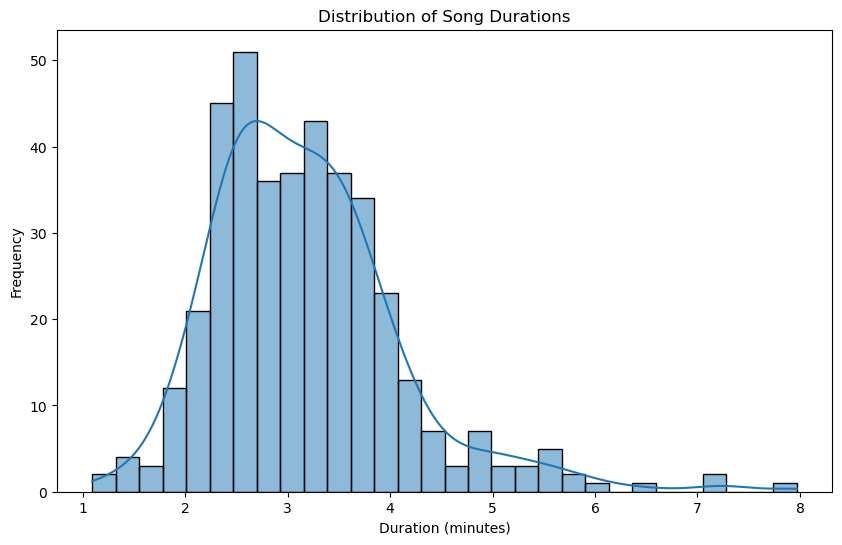

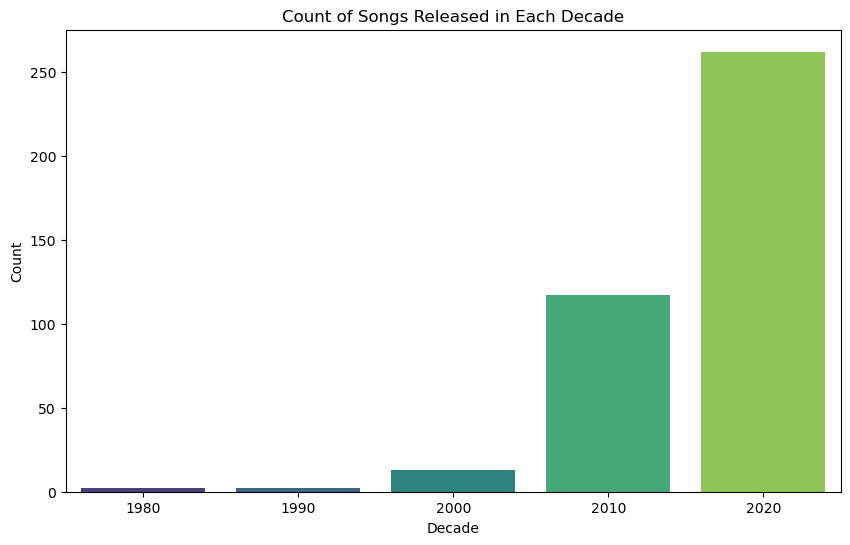

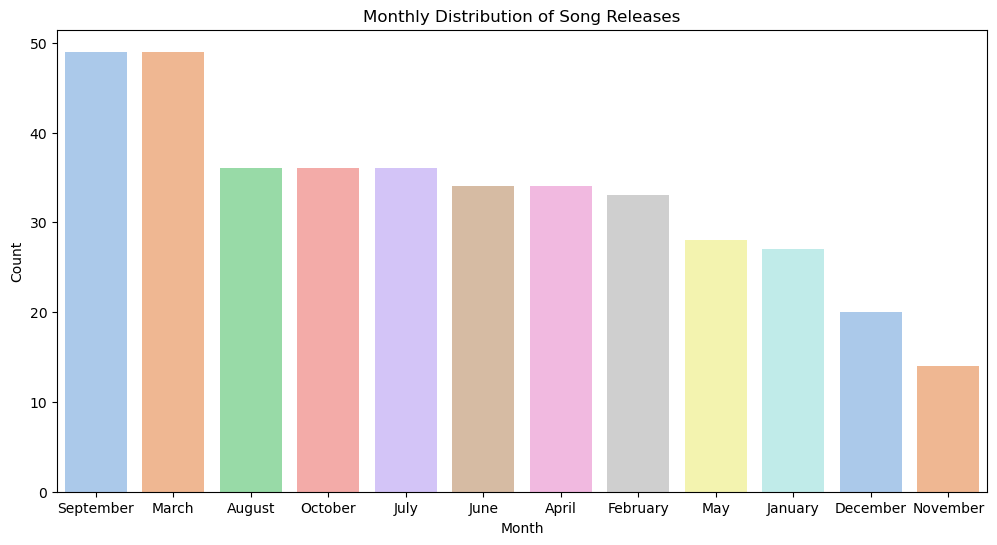

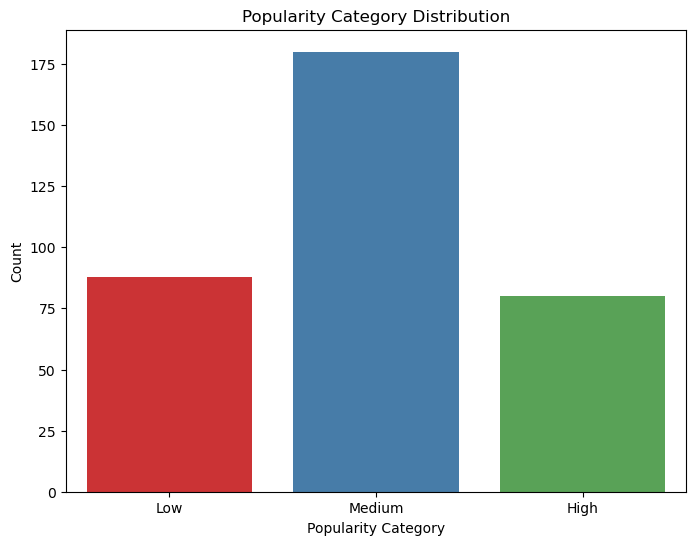

                 Spotify ID              Artist IDs                Track Name  \
217  37ZJ0p5Jm13JPevGcx4SkF  58lV9VcRSjABbAbfWS6skp        Livin' On A Prayer   
292  4ZpXHlV2vQVfPXUvbDSZ92  4opTS86dN9uO313J9CE8xg            I Remember You   
236  1aXFBWnnPFRKUN7vuIA5h0  2ye2Wgw4gimLv2eAKyk1NB             Turn The Page   
293  6RxF2qmsTBsXFgK0lx8WEj  40KlwpvpKEQtZTJgbml8lT                   Gemiler   
337  0M6TRIhQggFpwgaefCfnGH  0EyuKHE1AeE9lWUF8mzKVp  Hemorrhage (In My Hands)   

               Album Name Artist Name Release Date  Duration (ms)  Popularity  \
217     Slippery When Wet    Bon Jovi   1986-08-16         249293          88   
292              Skid Row    Skid Row   1989-01-24         313693          70   
236           Garage Inc.   Metallica   1998-01-01         366466          67   
293                     O      Teoman   1998-06-19         260066          60   
337  Something Like Human        Fuel   2000-09-08         236866          50   

     Date                 

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Convert 'Release Date' to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Feature 1: Song Duration in Minutes
df['Duration_minutes'] = df['Duration (ms)'] / (60 * 1000)

# Feature 2: Decade of Release
df['Decade'] = (df['Release Date'].dt.year // 10) * 10

# Feature 3: Release Month
df['Release Month'] = df['Release Date'].dt.month_name()

# Feature 4: Popularity Category (Low, Medium, High)
df['Popularity Category'] = pd.cut(df['Popularity'], bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])

# Plots to Visualize the New Features

# Plot 1: Distribution of Song Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Count of Songs Released in Each Decade
plt.figure(figsize=(10, 6))
sns.countplot(x='Decade', data=df, palette='viridis')
plt.title('Count of Songs Released in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

# Plot 3: Monthly Distribution of Song Releases
plt.figure(figsize=(12, 6))
sns.countplot(x='Release Month', data=df, order=df['Release Month'].value_counts().index, palette='pastel')
plt.title('Monthly Distribution of Song Releases')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Plot 4: Popularity Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Popularity Category', data=df, palette='Set1')
plt.title('Popularity Category Distribution')
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.show()

# Display the updated DataFrame with new features
print(df.head())


### 4.8 Unsupervised Learning - Isolation Forest

#### 4.8.1 Anomaly Detection in musical features via Isolation Forest

In this section, the code employs the Isolation Forest algorithm for anomaly detection in a music dataset. After loading the dataset and selecting relevant features such as 'Danceability,' 'Energy,' 'Speechiness,' 'Acousticness,' and 'Valence,' the Isolation Forest model is initialized and fitted to the data. 

The model predicts outliers, marking them with the 'Anomaly' label. To visualize the detected outliers, a scatter plot is generated, with the x-axis representing the dataset index and the y-axis denoting song popularity. Outliers are differentiated by color using the 'viridis' colormap. The code then identifies and prints outlier songs, displaying their track name, artist name, and popularity. 

Finally, the 'Anomaly' column is dropped from the dataset, providing a dataset for further analysis while preserving insights into identified anomalies.

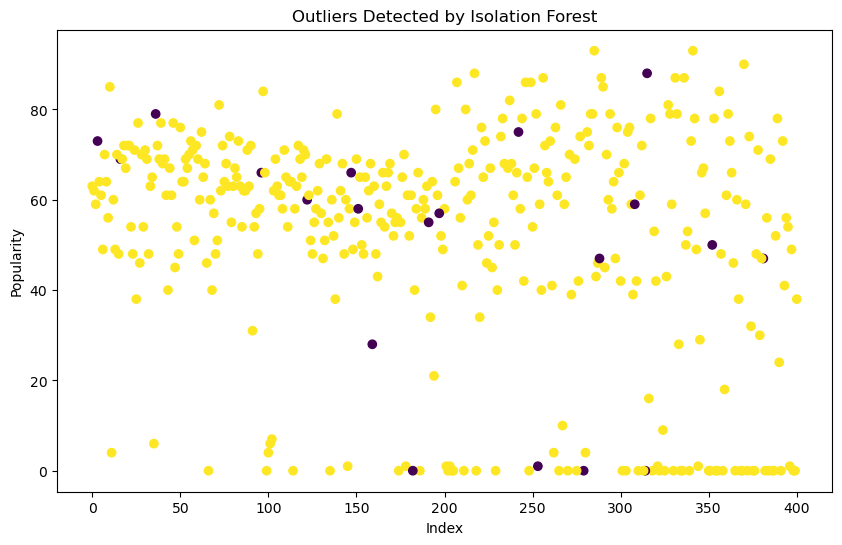

Outlier Songs:
                                  Track Name                      Artist Name  \
242                                     idfc                        blackbear   
315                                  Revenge                     XXXTENTACION   
96   Borrowed Love (feat. Swae Lee & WizKid)     Metro Boomin,Swae Lee,Wizkid   
147  Borrowed Love (feat. Swae Lee & WizKid)     Metro Boomin,Swae Lee,Wizkid   
308                     Dreams Money Can Buy                            Drake   
381                              Yeşillendir                 Ceg,Anıl Piyancı   
314                                 Işık Var                     Batdora,Odin   
36              Mood Swings (feat. Lil Tjay)               Pop Smoke,Lil Tjay   
197                       I Don't Wanna Know              SOMMA,Brenda Mullen   
352                               Cümle Alem             Murda,Ezhel,Kalibwoy   
253                           Hayatın Vuruşu                       The Square   
279          

In [506]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Select relevant features
features_for_anomaly_detection = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']

# Extract features for anomaly detection
X_anomaly = df[features_for_anomaly_detection]

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on your dataset

# Fit the model
iso_forest.fit(X_anomaly)

# Predict outliers
df['Anomaly'] = iso_forest.predict(X_anomaly)

# Visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Popularity'], c=df['Anomaly'], cmap='viridis')
plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.show()

# Display outlier songs
outliers = df[df['Anomaly'] == -1]
print("Outlier Songs:")
print(outliers[['Track Name', 'Artist Name', 'Popularity']])

# Drop the 'Anomaly' column if you don't need it in the main analysis
df = df.drop(columns=['Anomaly'])


#### 4.8.2 Anomaly Detection Results

The output reveals a list of outlier songs detected by the Isolation Forest algorithm. These outliers exhibit unusual patterns in the selected features, deviating from the general trend of the dataset. 

Noteworthy outlier songs include "idfc" by blackbear with a popularity score of 75, "Revenge" by XXXTENTACION with a high popularity of 88, and "Mood Swings (feat. Lil Tjay)" by Pop Smoke and Lil Tjay, boasting a popularity of 79. The presence of these outliers suggests distinct characteristics that make them stand out from the majority of songs in the dataset, providing valuable insights into potentially unique or exceptional music compositions. 

### 4.9 Network Analysis

#### 4.9.1. Genre Collaboration Analysis via NetworkX

In this section, the code constructs a genre collaboration network from a Spotify top songs dataset, creating edges between genres based on shared occurrences in song entries. The resulting network, represented as an undirected graph using NetworkX, is then analyzed to provide key insights. 

The summary reveals the total number of genres, the overall collaborations (edges) between genres, and the average collaboration per genre. Additionally, the code identifies the most common genre collaborations, showcasing the top five pairs with the highest frequency of shared occurrences. 

This genre collaboration network analysis offers an overview of the interconnections and collaborations observed within the music genres present in the dataset, providing infos on genre relationships and prevalent collaborations.

In [507]:
import pandas as pd
import networkx as nx

# Load your Spotify top songs dataset (assuming df is your DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Create an undirected graph
G = nx.Graph()

# Extract genres for each song
for _, row in df.iterrows():
    # Check if the 'Genres' value is a string
    if isinstance(row['Genres'], str):
        genres = row['Genres'].split(',')
        for i in range(len(genres)):
            for j in range(i + 1, len(genres)):
                # Add an edge between genres
                if G.has_edge(genres[i], genres[j]):
                    G[genres[i]][genres[j]]['weight'] += 1
                else:
                    G.add_edge(genres[i], genres[j], weight=1)

# Analyze the network
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / total_nodes

# Print the summary
print(f"Genre Collaboration Network Summary:")
print(f"Total Genres: {total_nodes}")
print(f"Total Collaborations (Edges): {total_edges}")
print(f"Average Collaboration per Genre: {average_degree:.2f}")

# Find the most common collaborations
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
most_common_collaborations = sorted_edges[:5]

print("\nMost Common Collaborations:")
for edge in most_common_collaborations:
    genre1, genre2, weight = edge
    print(f"{genre1} - {genre2}: {weight['weight']} collaborations")


Genre Collaboration Network Summary:
Total Genres: 157
Total Collaborations (Edges): 642
Average Collaboration per Genre: 8.18

Most Common Collaborations:
turkish hip hop - turkish trap: 115 collaborations
hip hop - rap: 47 collaborations
turkce drill - turkish hip hop: 39 collaborations
pop rap - rap: 35 collaborations
turkce drill - turkish trap: 35 collaborations


#### 4.9.2. Artist Collaboration Analysis via NetworkX

In this section, the code processes a Spotify top songs dataset to construct a collaboration network among artists. By extracting artist information and creating edges in a graph based on shared appearances in track entries, the code forms a comprehensive representation of artist collaborations. The resulting network, analyzed using NetworkX, yields essential insights. 

The summary includes metrics such as the total number of artists, the overall collaborations (edges) between artists, and the average collaboration per artist. The code identifies the most common artist collaborations, presenting the top five pairs with the highest frequency of shared appearances. This artist collaboration network analysis increases understanding of the relationships and collaborations within the music industry.

In [508]:
import pandas as pd
import networkx as nx

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' to string
df['Date'] = df['Date'].astype(str)

# Create a list of unique artists
artists = set(artist for artist_list in df['Artist Name'].str.split(',') for artist in artist_list)

# Initialize a graph
G = nx.Graph()

# Create a dictionary to store collaboration counts
collaboration_counts = {}

# Iterate through the rows and add edges to the graph
for _, row in df.iterrows():
    track_artists = row['Artist Name'].split(',')
    # Ensure collaborations have a maximum of 4 artists
    if len(track_artists) > 4:
        track_artists = track_artists[:4]
    for artist1 in track_artists:
        for artist2 in track_artists:
            if artist1 != artist2:
                # Update collaboration counts
                collaboration_counts.setdefault((artist1, artist2, row['Date']), 0)
                collaboration_counts[(artist1, artist2, row['Date'])] += 1

# Find the top 20 collaborations
top_collaborations = sorted(collaboration_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Print the specified positions in the top 20 collaborations with detailed information
positions_to_print = [1, 3, 5, 7, 9]
print("Top Collaborations:")
for i, position in enumerate(positions_to_print, start=1):
    collab_index = position * 2 - 1
    collaboration, count = top_collaborations[collab_index]
    artists_str = ', '.join(collaboration[:2])
    print(f"{i}. {artists_str}: {count} collaborations")
    # Additional details for each collaboration
    years_collaborated = [date for artist1, artist2, date in collaboration_counts.keys() if (artist1, artist2) == collaboration[:2]]
    print(f"   Dates Collaborated: {', '.join(years_collaborated)}")
    print()


Top Collaborations:
1. Dante, Odin: 5 collaborations
   Dates Collaborated: 2020, 2021, 2022, 2023

2. Odin, Batdora: 4 collaborations
   Dates Collaborated: 2020, 2021, 2022, 2023

3. Young Bego, Khontkar: 3 collaborations
   Dates Collaborated: 2020

4. Ezhel, Ufo361: 3 collaborations
   Dates Collaborated: 2020

5. Bonez MC, RAF Camora: 3 collaborations
   Dates Collaborated: 2023



## Findings 

### 1) Findings in Exploratory Data Analysis and Visualization Part

While analyzing the music dataset from 2020 to 2023, I found some interesting insights. The most popular genres during this timeframe were notably Turkish trap and hip-hop, with "turkish trap" leading the chart, closely followed by "turkish hip-hop" and "rap." Most of my listening time goes to Turkish songs, so much that my dataset can be divided as Turkish and Non-Turkish Songs. The other languages are mostly English and German, with some Greek especially in 2023.

Ezhel kept his top place among my favorite artists when considering all 4 years, despite he is not the top artist in my later datas like 2022 or 2023. 

The visual representation through bar plots and pie charts that I created offered a snapshot of how genres were distributed. Additionally, a closer look at the trends over the years revealed a shift in musical preferences, underscoring the aging landscape :).

My exploration, utilizing descriptive statistics, histograms, boxplots, and scatterplots, provided a better understanding of numerical variables, uncovering distribution patterns, outliers, and trends. The personalized touch of pair plots and correlation matrices shed a light to relationships between numerical features, such as the noteworthy correlation between "popularity" and "loudness." 

Altogether, my analysis and visualizations provided a rich understanding of my musical journey from 2020 to 2023.

### 2) Findings in Hypothesis Tests

I conducted 4 different hypothesis tests to check if my predictions about my listening habits are statistically true. 

To understand the dynamics of popularity, the first hypothesis test checked the mean popularity difference between Turkish and Non-Turkish songs. The results were interesting, revealing a substantial difference in mean popularity, as denoted by the test statistic of -6.509 and a minuscule p-value of 2.53e-10. Cohen's d, standing at -0.689, emphasized this discrepancy, solidifying the rejection of the null hypothesis. Visualizing confidence intervals through an error bar plot enriches insights into the uncertainty surrounding mean popularity estimates for both genres.

The second hypothesis test checked the popularity variations among the top 10 artists. A F-statistic of 105.83, coupled with a p-value of 2.03e-33, led to the rejection of the null hypothesis, signifying significant differences in popularity among the top 10 artists. The post-hoc analysis, courtesy of Tukey's HSD, pinpointed specific pairs of artists with notably distinct popularity levels.

Zooming into numeric columns for hypothesis test three, danceability, energy, loudness, speechiness, acousticness, instrumentalness, and liveness exhibited no significant differences between 2020 and 2023. However, valence and tempo stood out with statistically significant disparities. Tempo was expected as the BPM preference of my music taste decreased significantly after 2021 era(where drill music made the top of the lists in various countries), I wasn't expecting a significant change in valence.

Finally, the fourth hypothesis test, examining the statistical changes in my top artists from 2020 to 2023, brought forth a Chi-square statistic of 129.38 with a p-value of 0.79. The conclusive finding? No significant change in top artists during this period. That was interesting too, because my top artists actually changed a lot for me. What's causing this data is some of the artists included in all 4 years, which I cannot stop listening.



### 3) Findings in Machine Learning Models

The Random Forest Classifier achieved a 78% accuracy in predicting song preferences, with notable precision (0.79) and high recall (0.97) for songs not liked. However, precision for liked songs was lower (0.67), and recall significantly lower (0.20). The F1-scores reflected a trade-off between precision and recall, with values of 0.87 for not liked songs and 0.31 for liked songs. The macro avg and weighted averages were 0.73, 0.58, and 0.59, respectively, indicating varied performance across classes.

In Linear Regression, the Mean Squared Error (MSE) was 563.92, providing a tangible measure of the model's accuracy in predicting song popularity based on selected features. The scatter plot visualization demonstrated the model's ability to capture the inherent variability in popularity, focusing on the 'Danceability' feature.

For music genre prediction, the Random Forest Classifier achieved a 32% accuracy. Precision, recall, and F1-scores varied across genres, emphasizing the model's differing effectiveness. The macro and weighted averages considered genre imbalance, revealing insights into the model's overall performance in capturing audio features for genre prediction.

The K-Means Clustering analysis applied to audio features yielded three distinct clusters, revealing patterns in songs' 'Danceability' and 'Energy'. There are 3 different clusters detected, which I expected more, but I guess that's limited because despite I listen to various genres, my main genres are generally the same. And those genres do not really vary a lot in those metrics.

The SARIMA model showcased convergence after 22 iterations, providing a reliable forecast of an upward trend in song popularity post-2020. It plotted a prediction based on past data, and it forecasted 2024-2025 values which are interesting to check.

Correlation analysis highlighted key associations, such as the positive correlation between 'Danceability' and 'Valence', and a strong positive correlation between 'Valence' and 'Popularity', shedding light on influential factors in song success.

Feature Engineering introduced new features that does not exist in dataset, like 'Duration_minutes,' 'Decade,' 'Release Month,' and 'Popularity Category'. Visualizations provided insights into song duration distribution, release decade count, monthly distribution, and popularity category distribution. The duration minutes, decade and popularity category did not surprise as they are already my expected values for my listening habits, but it was interesting to see the Release Month data. I generally like soulful and afro-based instrumentals, hence I was expecting to see more songs released in summer. The findings show me the opposite.

The Isolation Forest algorithm successfully detected outlier songs, including "idfc" (popularity: 75), "Revenge" (popularity: 88), and "Mood Swings" (popularity: 79), revealing unique patterns in selected features. I had no idea these were outliers, it looks like they despite none of these songs is released after 2020, they are still very popular.

Genre Collaboration Network Analysis identified 157 genres with 642 collaborations. Top collaborations include "turkish hip hop - turkish trap" (115 collaborations) and "hip hop - rap" (47 collaborations). This analysis is not surprising, as artists prefer to put multiple genres in the description to enrich their chances of a trend boom.

Artist Collaboration Network Analysis highlighted collaborations like "Dante, Odin" (5 collaborations) and "Odin, Batdora" (4 collaborations), offering insights into artist relationships and industry collaborations. Dante is me, and Odin & Batdora are my close friends, so highest collaboration rate is not surprising either :)

## Limitations and Future Work

There may be more metrics for songs, but Spotify does not keep them. I wanted to see the Hertz and Key values to analyze how aging 4 years changes the preferences in terms of those, because each Key has a different mood in it, and each Hertz give different signals to our brain. As a future work, I may do more Machine Learning Models, as out of all subjects, they are the ones that I'm the least familiar.